In [1]:
import geopandas as gpd
import pandas as pd
import pathlib

import matplotlib.pyplot as plt

from cartopy import crs as ccrs

import os
import sys
import subprocess
import datetime
import platform
import datetime

In [3]:
chicago = gpd.read_file("Basemap/geo_export_c929b563-c4bb-45df-82b1-3f329643ec70.shp")

In [4]:
chicago.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10                                           geometry  
0  None        17    842400  POLYGON ((-87.62405 41.73022, -87.62405 41.730...  
1  None        17    840300  POLYGON ((-87.68608 41.82296, -87.68607 41.823...  
2  None        17    841100  POLYGON ((-87.62935 41.85280, -87.62934 41.852...  
3  None        17    841200  POLYGON ((-87.68813 41.85569, -87.68816 41.856...  
4  None        17    839000  POLYGON ((-87.63312 41.87449, -87.63306 41.874...

<AxesSubplot:>

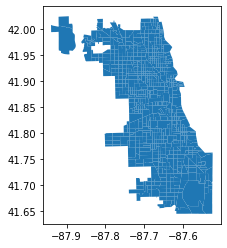

In [5]:
chicago.plot()

# Exposure

In [15]:
ex = pd.read_csv('exposure_census.csv', dtype = {"GEOID":str,"GEO_ID":str})
ex.head()

Unnamed: 0  State  Price              AFFGEOID       GEOID         fuel  \
0           0      9  2.229  1400000US09001022000  9001022000  1057.581145   
1           1      9  2.229  1400000US09001042500  9001042500  1175.059270   
2           2      9  2.229  1400000US09001043500  9001043500  1108.900146   
3           3      9  2.229  1400000US09001010700  9001010700   591.341144   
4           4      9  2.229  1400000US09001021500  9001021500   561.379578   

       GEO_ID                                             NAME  HH_num_total  \
0  9001022000  Census Tract 220, Fairfield County, Connecticut          1020   
1  9001042500  Census Tract 425, Fairfield County, Connecticut          1465   
2  9001043500  Census Tract 435, Fairfield County, Connecticut           933   
3  9001010700  Census Tract 107, Fairfield County, Connecticut          1682   
4  9001021500  Census Tract 215, Fairfield County, Connecticut          2094   

   median_income  exposure  min_max_ex  
0        82753.0  0.028487    0.055157  
1       129821.0  0.020176    0.035431  
2       104417.0  0.023672    0.043729  
3        61667.0  0.021374    0.038277  
4        43357.0  0.028861    0.056045

In [53]:
ex = ex[['GEOID','fuel','Price','exposure','min_max_ex']]
chi_ex = pd.merge(ex,chicago,left_on='GEOID',right_on='geoid10',how='right')

In [17]:
chi_ex = gpd.GeoDataFrame(chi_ex,crs = 4326)

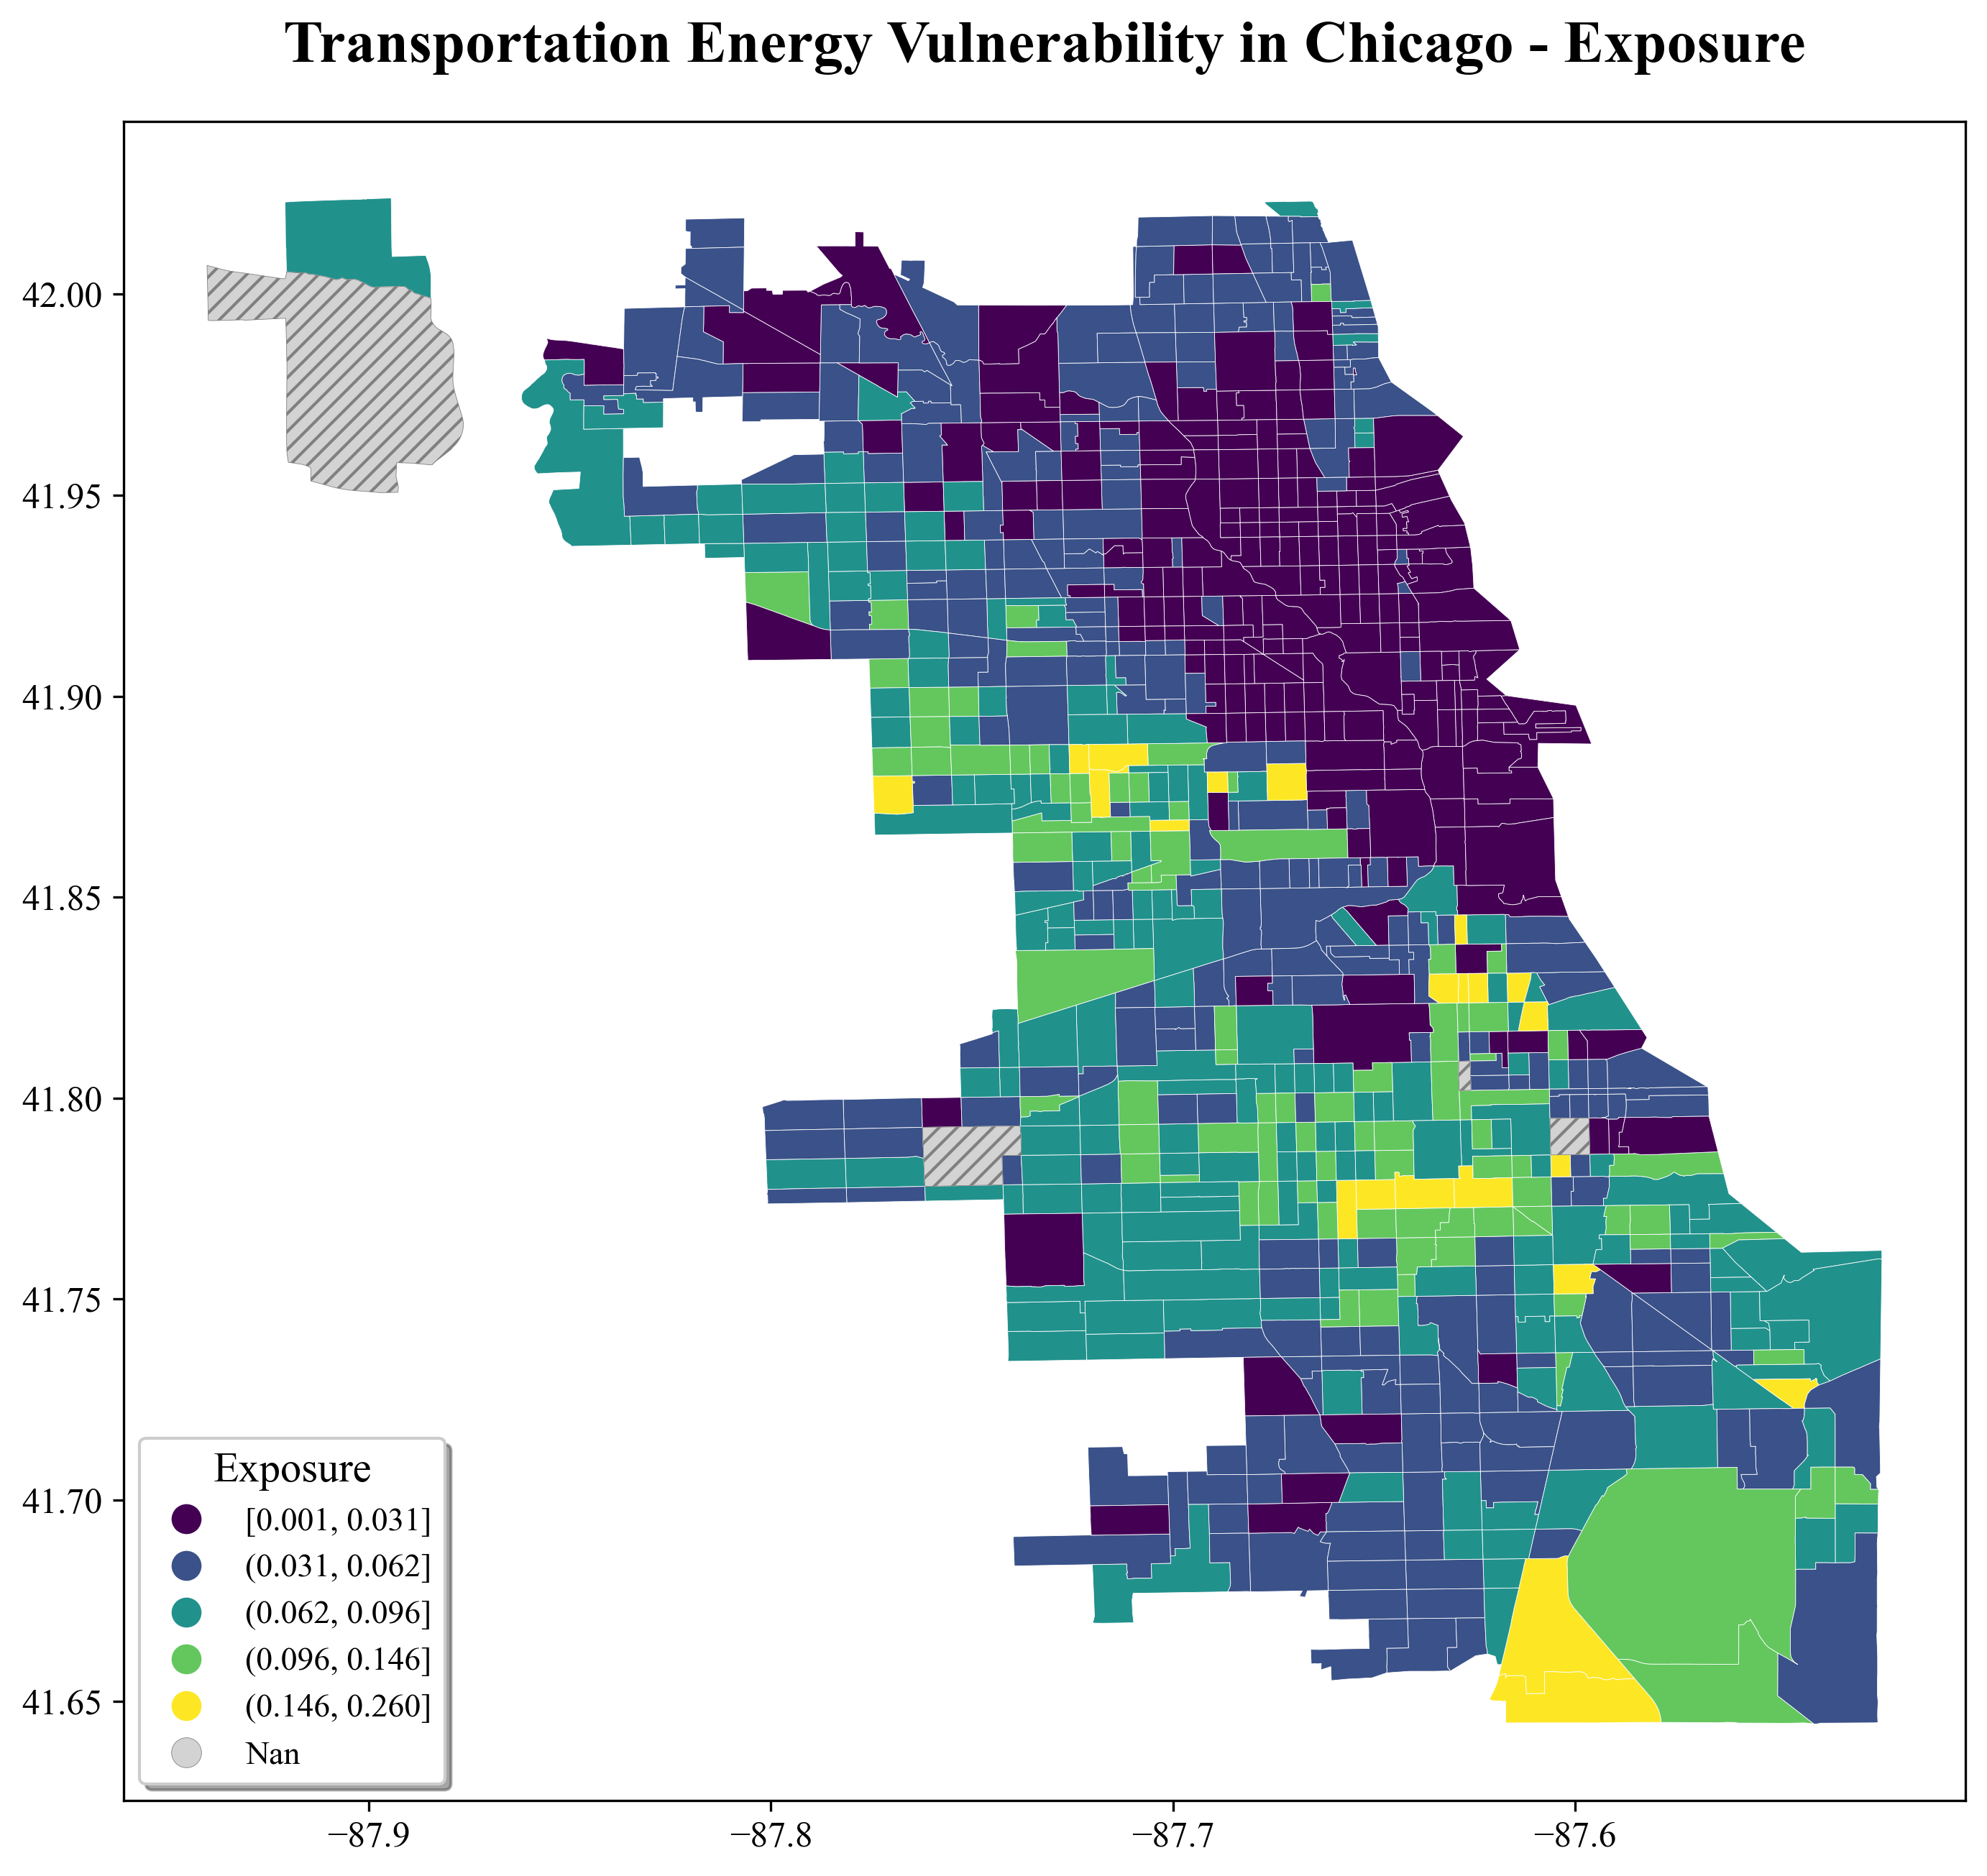

In [18]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_ex.plot(
    column='min_max_ex',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Exposure',
                 "fmt": "{:.3f}",
                 'title_fontsize': 14, 
                 'fontsize': 11, 
                 'shadow': True
                },               
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     prop={'family': 'Times New Roman', 'size': 16},
    edgecolor='white', #,np.array([0., 0., 0., 0.])
    linewidth=0.2
)

ax.axis('on')
ax.set_title('Transportation Energy Vulnerability in Chicago - Exposure',fontdict={'weight':'bold','size': 20},pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chicago_exposure_map.png', facecolor='w', dpi=500)

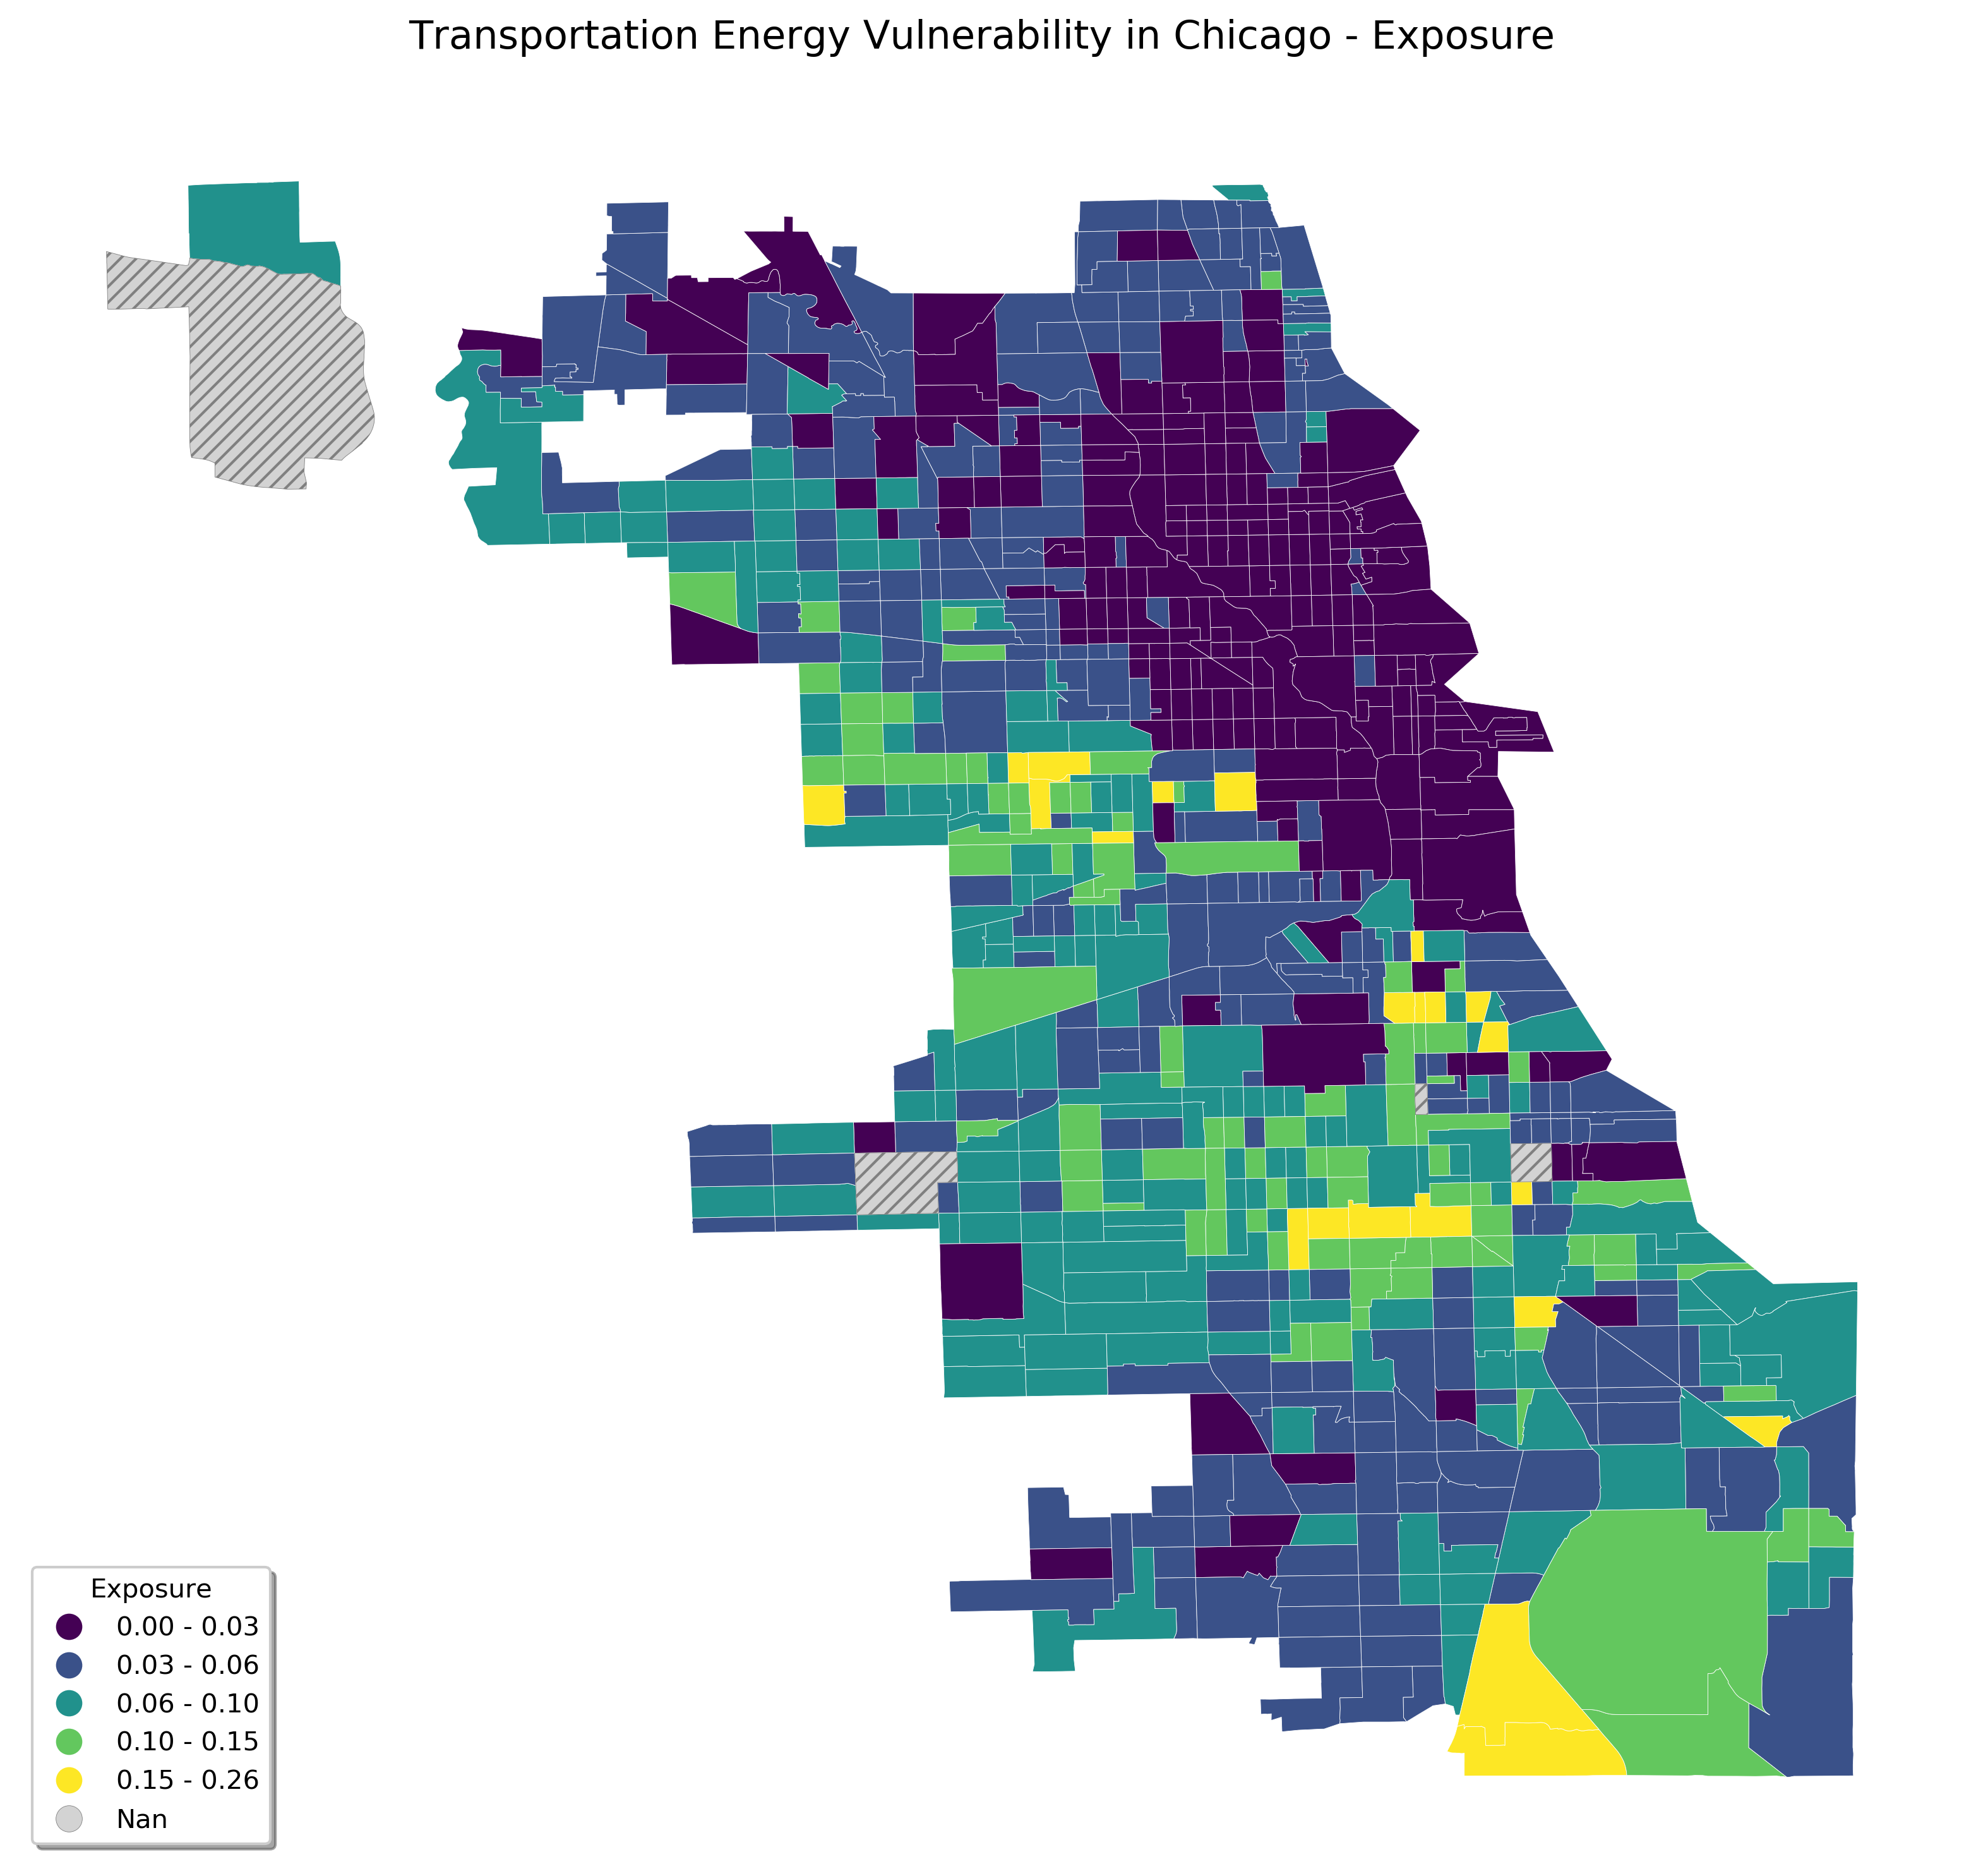

In [8]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_ex.plot(
    column='min-max',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Exposure',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Transportation Energy Vulnerability in Chicago - Exposure', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
fig.tight_layout()

fig.savefig('Chicago_exposure_map.png', facecolor='w', dpi=500)

# Sensitivity

In [20]:
sensitivity = pd.read_csv("sensitivity_census.csv", dtype={"Geocode": str})
sensitivity.head()

Unnamed: 0     Geocode        X1      X2        X3        X4        X5  \
0           0  1001020100  0.166583  0.4378  0.113397  0.009533  0.717010   
1           1  1001020200  0.166922  0.3305  0.582440  0.004594  0.639612   
2           2  1001020300  0.172512  0.2927  0.260051  0.066439  0.706872   
3           3  1001020400  0.046416  0.3711  0.070397  0.000000  0.751160   
4           4  1001020500  0.149207  0.3735  0.192337  0.030294  0.837958   

         X6        X7  Sensitivity  z_score_sens  min_max_sens  
0  0.132464  0.188660     0.252207     -0.345779      0.470402  
1  0.144972  0.196018     0.295008      0.444644      0.550234  
2  0.160251  0.201882     0.265815     -0.094468      0.495784  
3  0.244714  0.167870     0.235951     -0.645974      0.440083  
4  0.138071  0.198282     0.274236      0.061032      0.511489

In [54]:
chi_sens = pd.merge(chicago,sensitivity,left_on='geoid10',right_on="Geocode",how="left")
chi_sens.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10  \
0  None        17    842400   
1  None        17    840300   
2  None        17    841100   
3  None        17    841200   
4  None        17    839000   

                                            geometry  ...        X1      X2  \
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...  ...  0.231992  0.2337   
1  POLYGON ((-87.68608 41.82296, -87.68607 41.823...  ...  0.191968  0.3429   
2  POLYGON ((-87.62935 41.85280, -87.62934 41.852...  ...  0.301036  0.3842   
3  POLYGON ((-87.68813 41.85569, -87.68816 41.856...  ...  0.174444  0.4011   
4  POLYGON ((-87.63312 41.87449, -87.63306 41.874...  ...  0.178195  0.3258   

         X3        X4        X5        X6        X7  Sensitivity  \
0  0.970798  0.005516  0.835496  0.162232  0.213173     0.378987   
1  0.031615  0.547707  0.720308  0.096554  0.186272     0.302475   
2  0.014282  0.013162  0.809437  0.232988  0.120694     0.267971   
3  0.058657  0.635412  0.873746  0.049062  0.226559     0.345569   
4  0.135737  0.041698  0.952438  0.084483  0.070149     0.255500   

   z_score_sens  min_max_sens  
0      1.995484      0.706866  
1      0.582527      0.564160  
2     -0.054652      0.499806  
3      1.378346      0.644536  
4     -0.284962      0.476545  

[5 rows x 22 columns]

In [22]:
chi_sens = gpd.GeoDataFrame(chi_sens,crs = 4326)

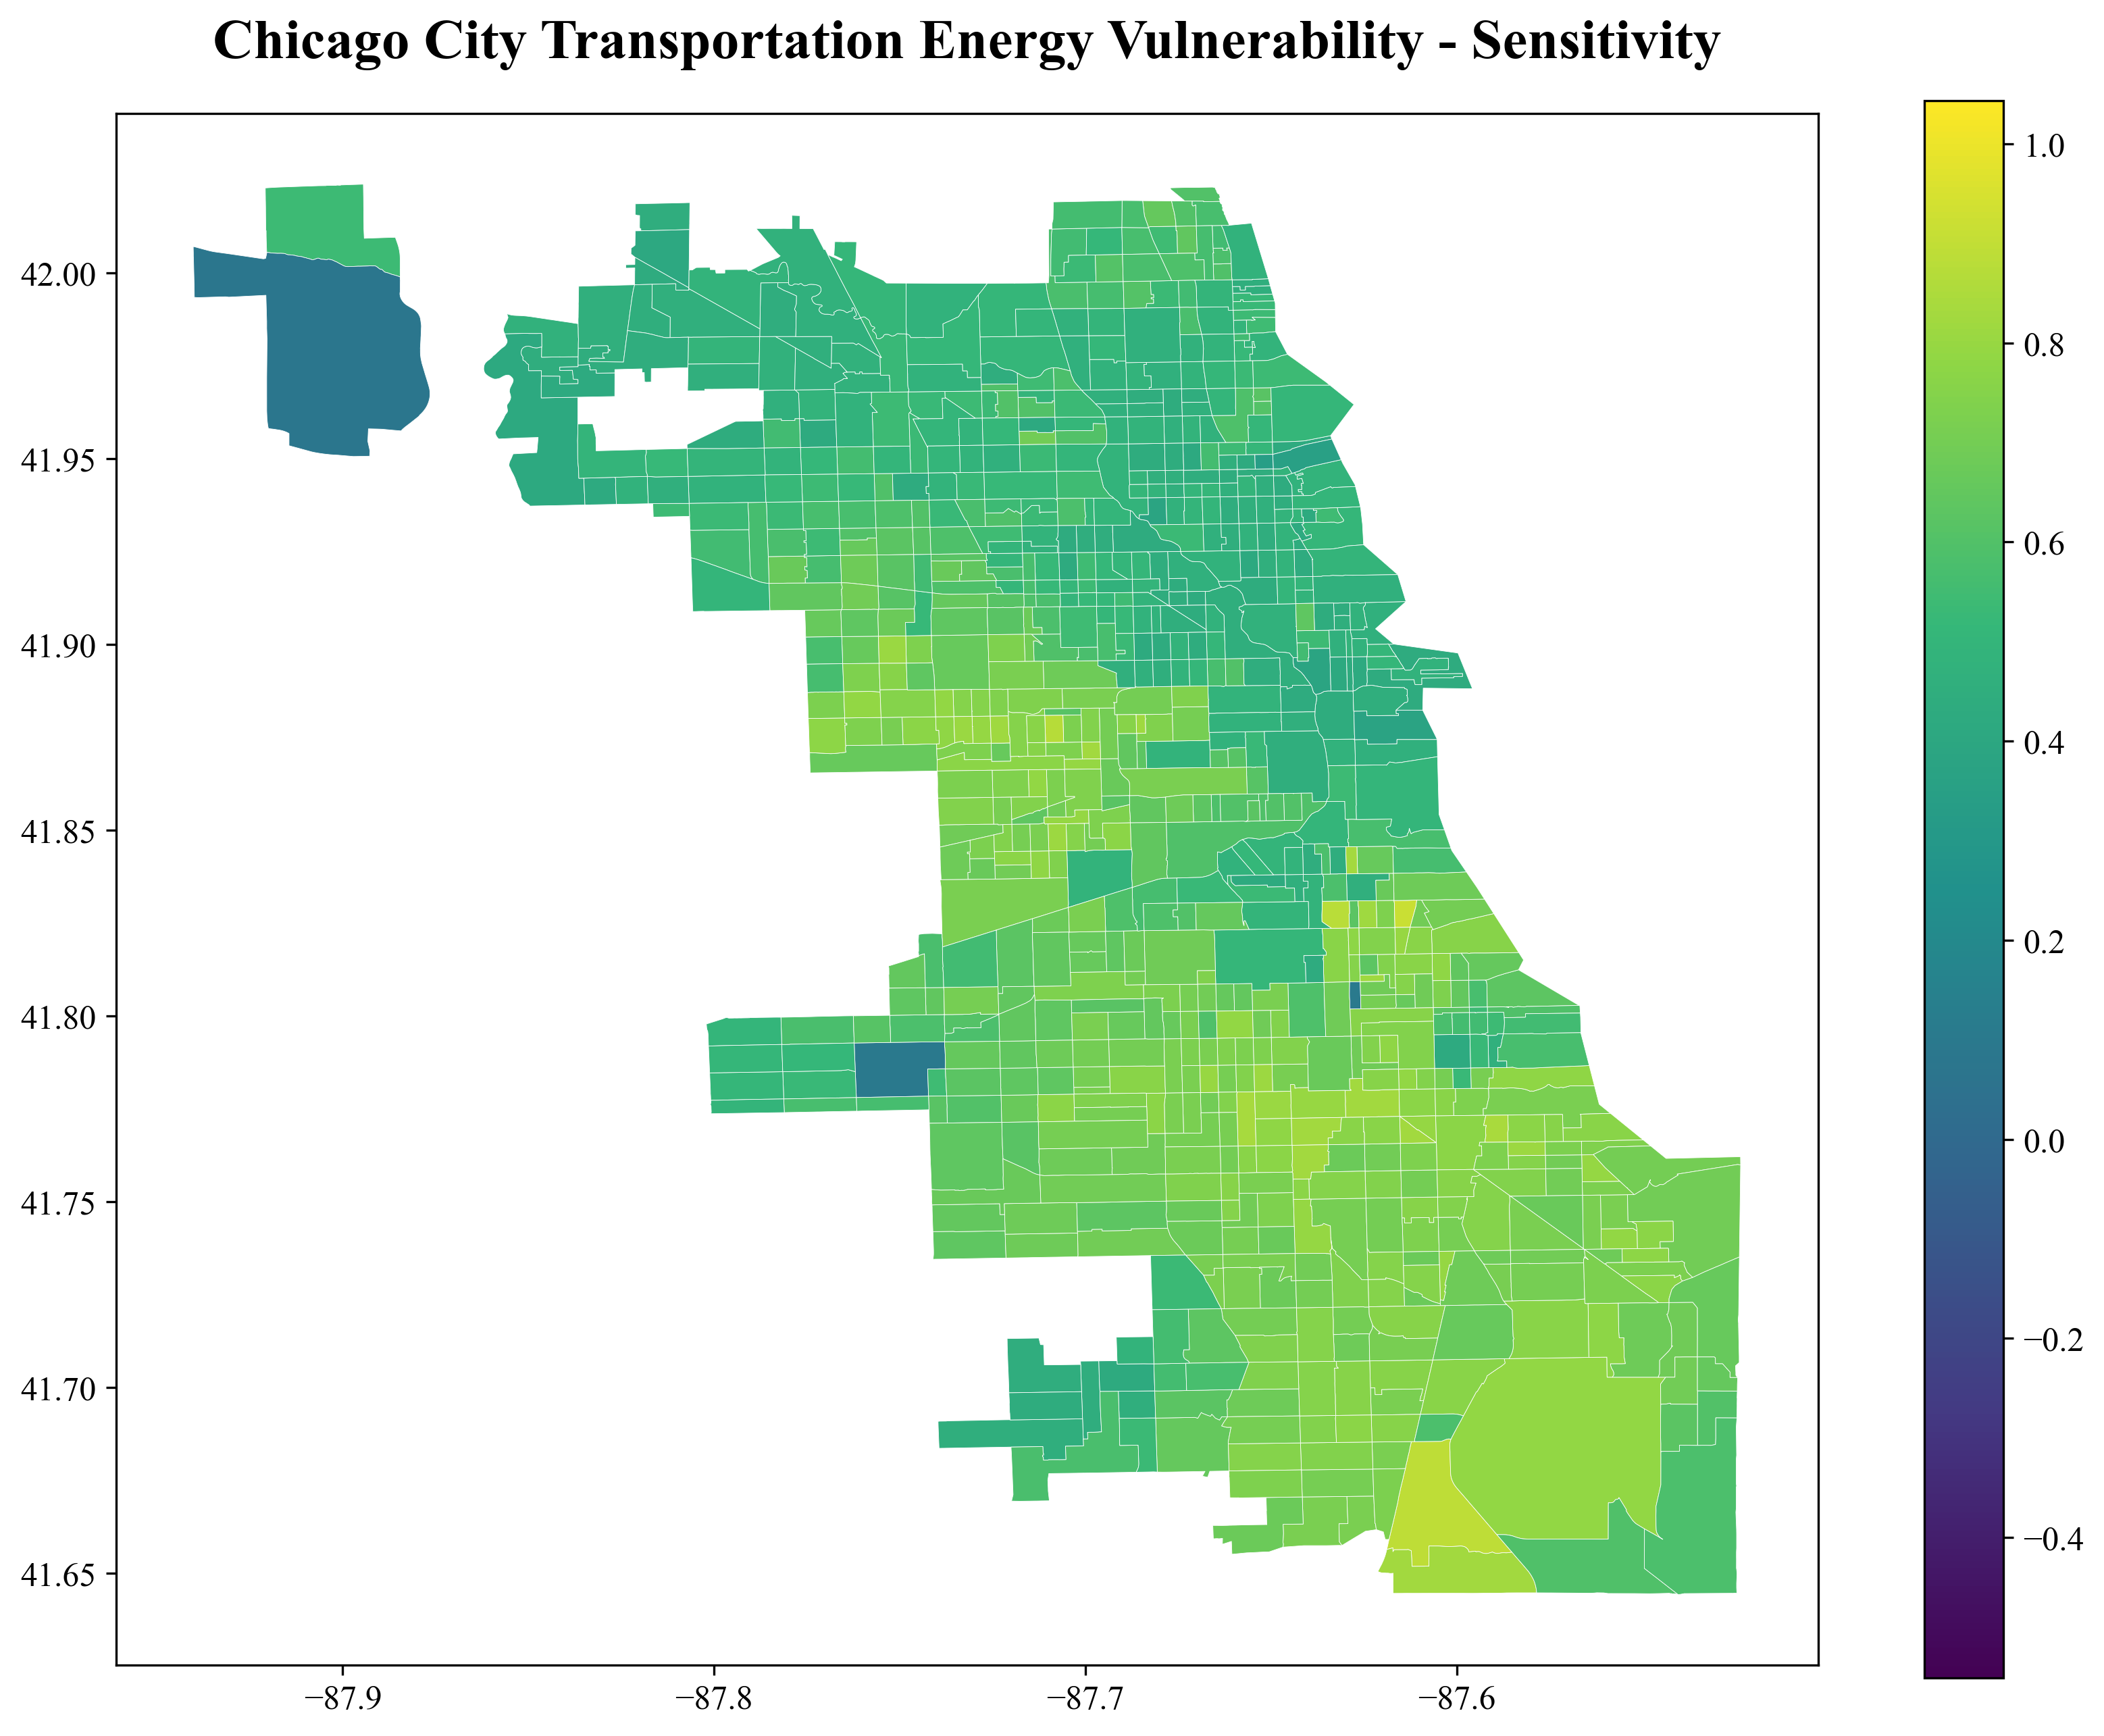

In [24]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

vmin = -0.541305087
vmax = 1.043413702

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_sens.plot(
    column='min_max_sens',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
#     scheme='NaturalBreaks',
#     k=7,
#     legend_kwds={'loc': 'lower left',
#                  'title': 'X7',
#                  'shadow': True
#                 },
#     missing_kwds={
#                  "color": "lightgrey",
#                  "edgecolor": "grey",
#                  "hatch": "////",
#                  "label": "Nan"
#                  },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2,
    vmin=vmin, vmax=vmax
)

ax.axis('on')
ax.set_title('Chicago City Transportation Energy Vulnerability - Sensitivity',fontdict={'weight':'bold','size': 20},pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chi_X7_test_map.png', facecolor='w', dpi=500)

# Adaptive Capacity

In [59]:
AC_tract_US = pd.read_csv("adaptive_capacity_census.csv",dtype={"GEO_ID":str})
AC_tract_US.head()

Unnamed: 0      GEO_ID  Weighted_D5be  Weighted_D4c  Weighted_D4a  \
0           0  1001020100            NaN           NaN           NaN   
1           1  1001020200            NaN           NaN           NaN   
2           2  1001020300            NaN           NaN           NaN   
3           3  1001020400            NaN           NaN           NaN   
4           4  1001020500            NaN           NaN           NaN   

   D5be_score  D4c_score  D4a_score  ac  min_max_ac  
0         NaN        NaN        NaN NaN         NaN  
1         NaN        NaN        NaN NaN         NaN  
2         NaN        NaN        NaN NaN         NaN  
3         NaN        NaN        NaN NaN         NaN  
4         NaN        NaN        NaN NaN         NaN

In [60]:
AC_tract_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74102 entries, 0 to 74101
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     74102 non-null  int64  
 1   GEO_ID         74102 non-null  object 
 2   Weighted_D5be  25521 non-null  float64
 3   Weighted_D4c   28063 non-null  float64
 4   Weighted_D4a   26565 non-null  float64
 5   D5be_score     25521 non-null  float64
 6   D4c_score      28063 non-null  float64
 7   D4a_score      26565 non-null  float64
 8   ac             25232 non-null  float64
 9   min_max_ac     25231 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.7+ MB


In [61]:
AC_tract_chicago = pd.merge(chicago,AC_tract_US,left_on="geoid10",right_on="GEO_ID",how="left")

In [62]:
AC_tract_chicago.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10  \
0  None        17    842400   
1  None        17    840300   
2  None        17    841100   
3  None        17    841200   
4  None        17    839000   

                                            geometry  Unnamed: 0       GEO_ID  \
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...       22399  17031842400   
1  POLYGON ((-87.68608 41.82296, -87.68607 41.823...       22381  17031840300   
2  POLYGON ((-87.62935 41.85280, -87.62934 41.852...       22386  17031841100   
3  POLYGON ((-87.68813 41.85569, -87.68816 41.856...       22387  17031841200   
4  POLYGON ((-87.63312 41.87449, -87.63306 41.874...       22370  17031839000   

   Weighted_D5be  Weighted_D4c  Weighted_D4a  D5be_score  D4c_score  \
0    21778.78071    347.166465    324.438979    0.027790   0.078890   
1    25538.32299    231.473587    264.089804    0.032587   0.052600   
2    24367.82944    200.014980    320.723399    0.031094   0.045451   
3    27205.52713    193.700494    197.478104    0.034714   0.044016   
4    41840.00631    412.479734    182.508506    0.053388   0.093731   

   D4a_score        ac  min_max_ac  
0   0.269088 -0.054136    0.407631  
1   0.219035 -0.044616    0.421611  
2   0.266006 -0.063154    0.394389  
3   0.163787 -0.028352    0.445493  
4   0.151372 -0.001417    0.485045

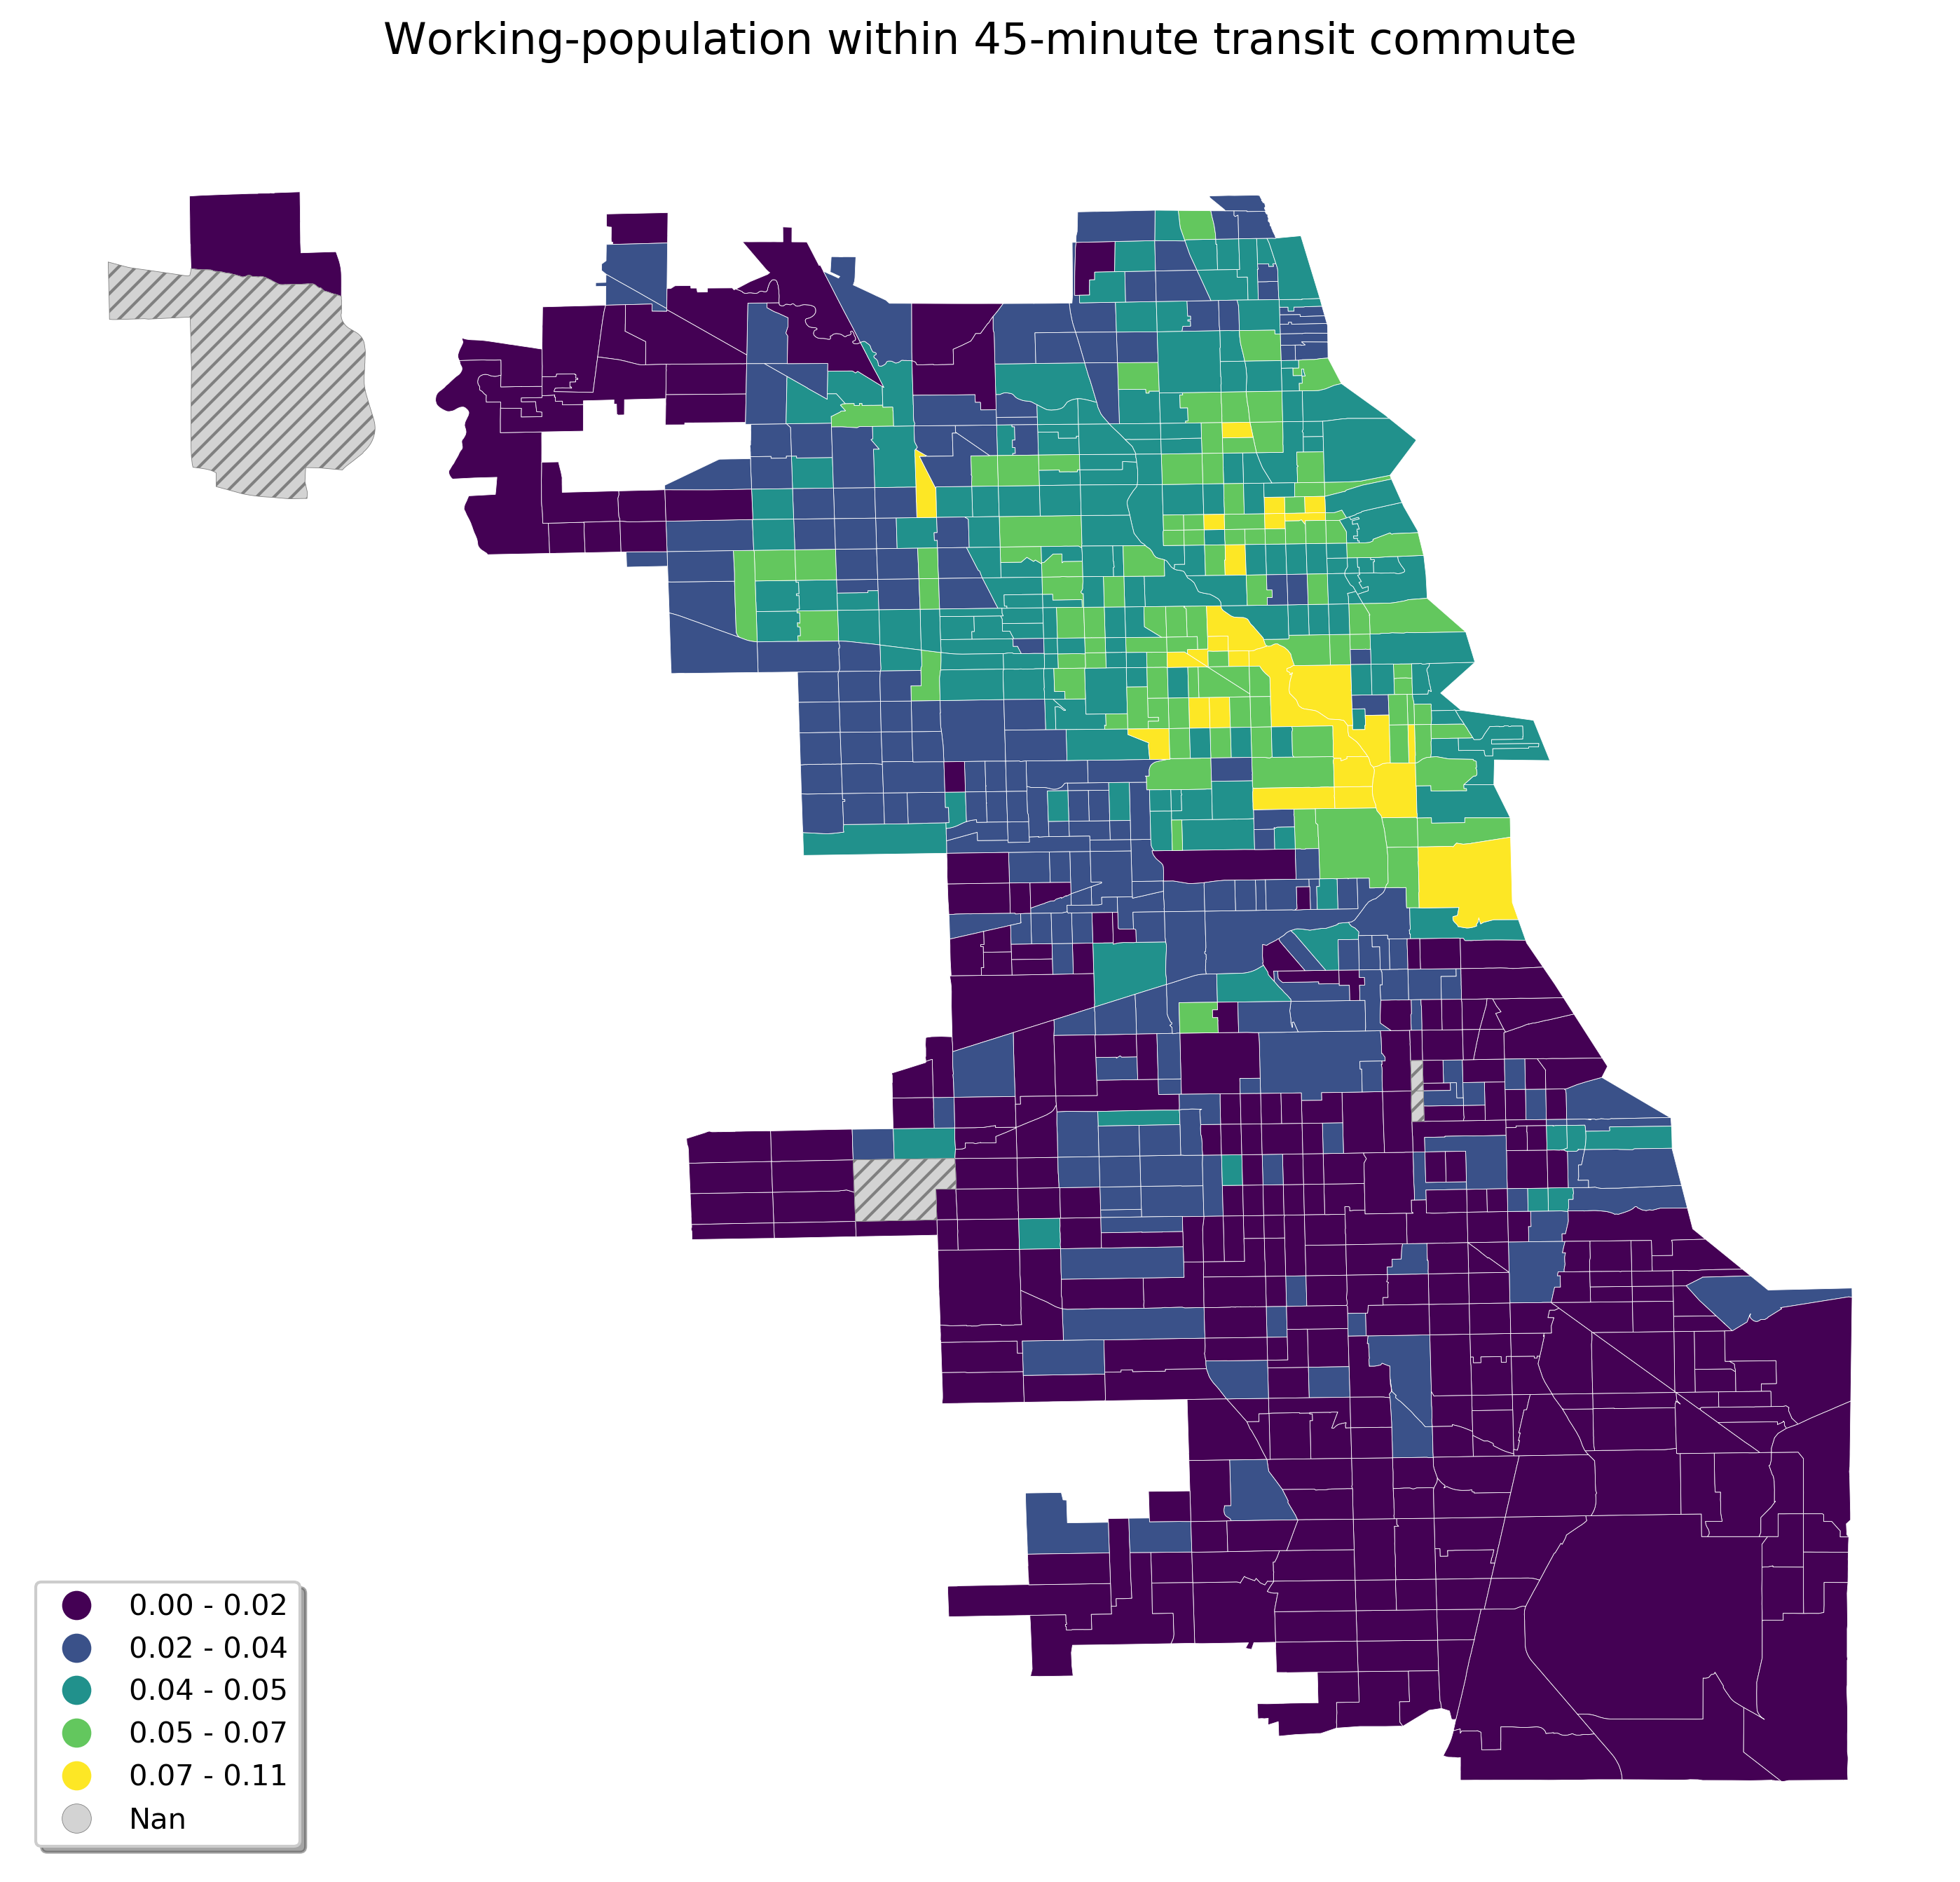

In [23]:

ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chi_sensitivity_map.png', facecolor='w', dpi=500)

import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='D5be_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': '',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Working-population within 45-minute transit commute', fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('D5be_normal_map.png', facecolor='w', dpi=500)

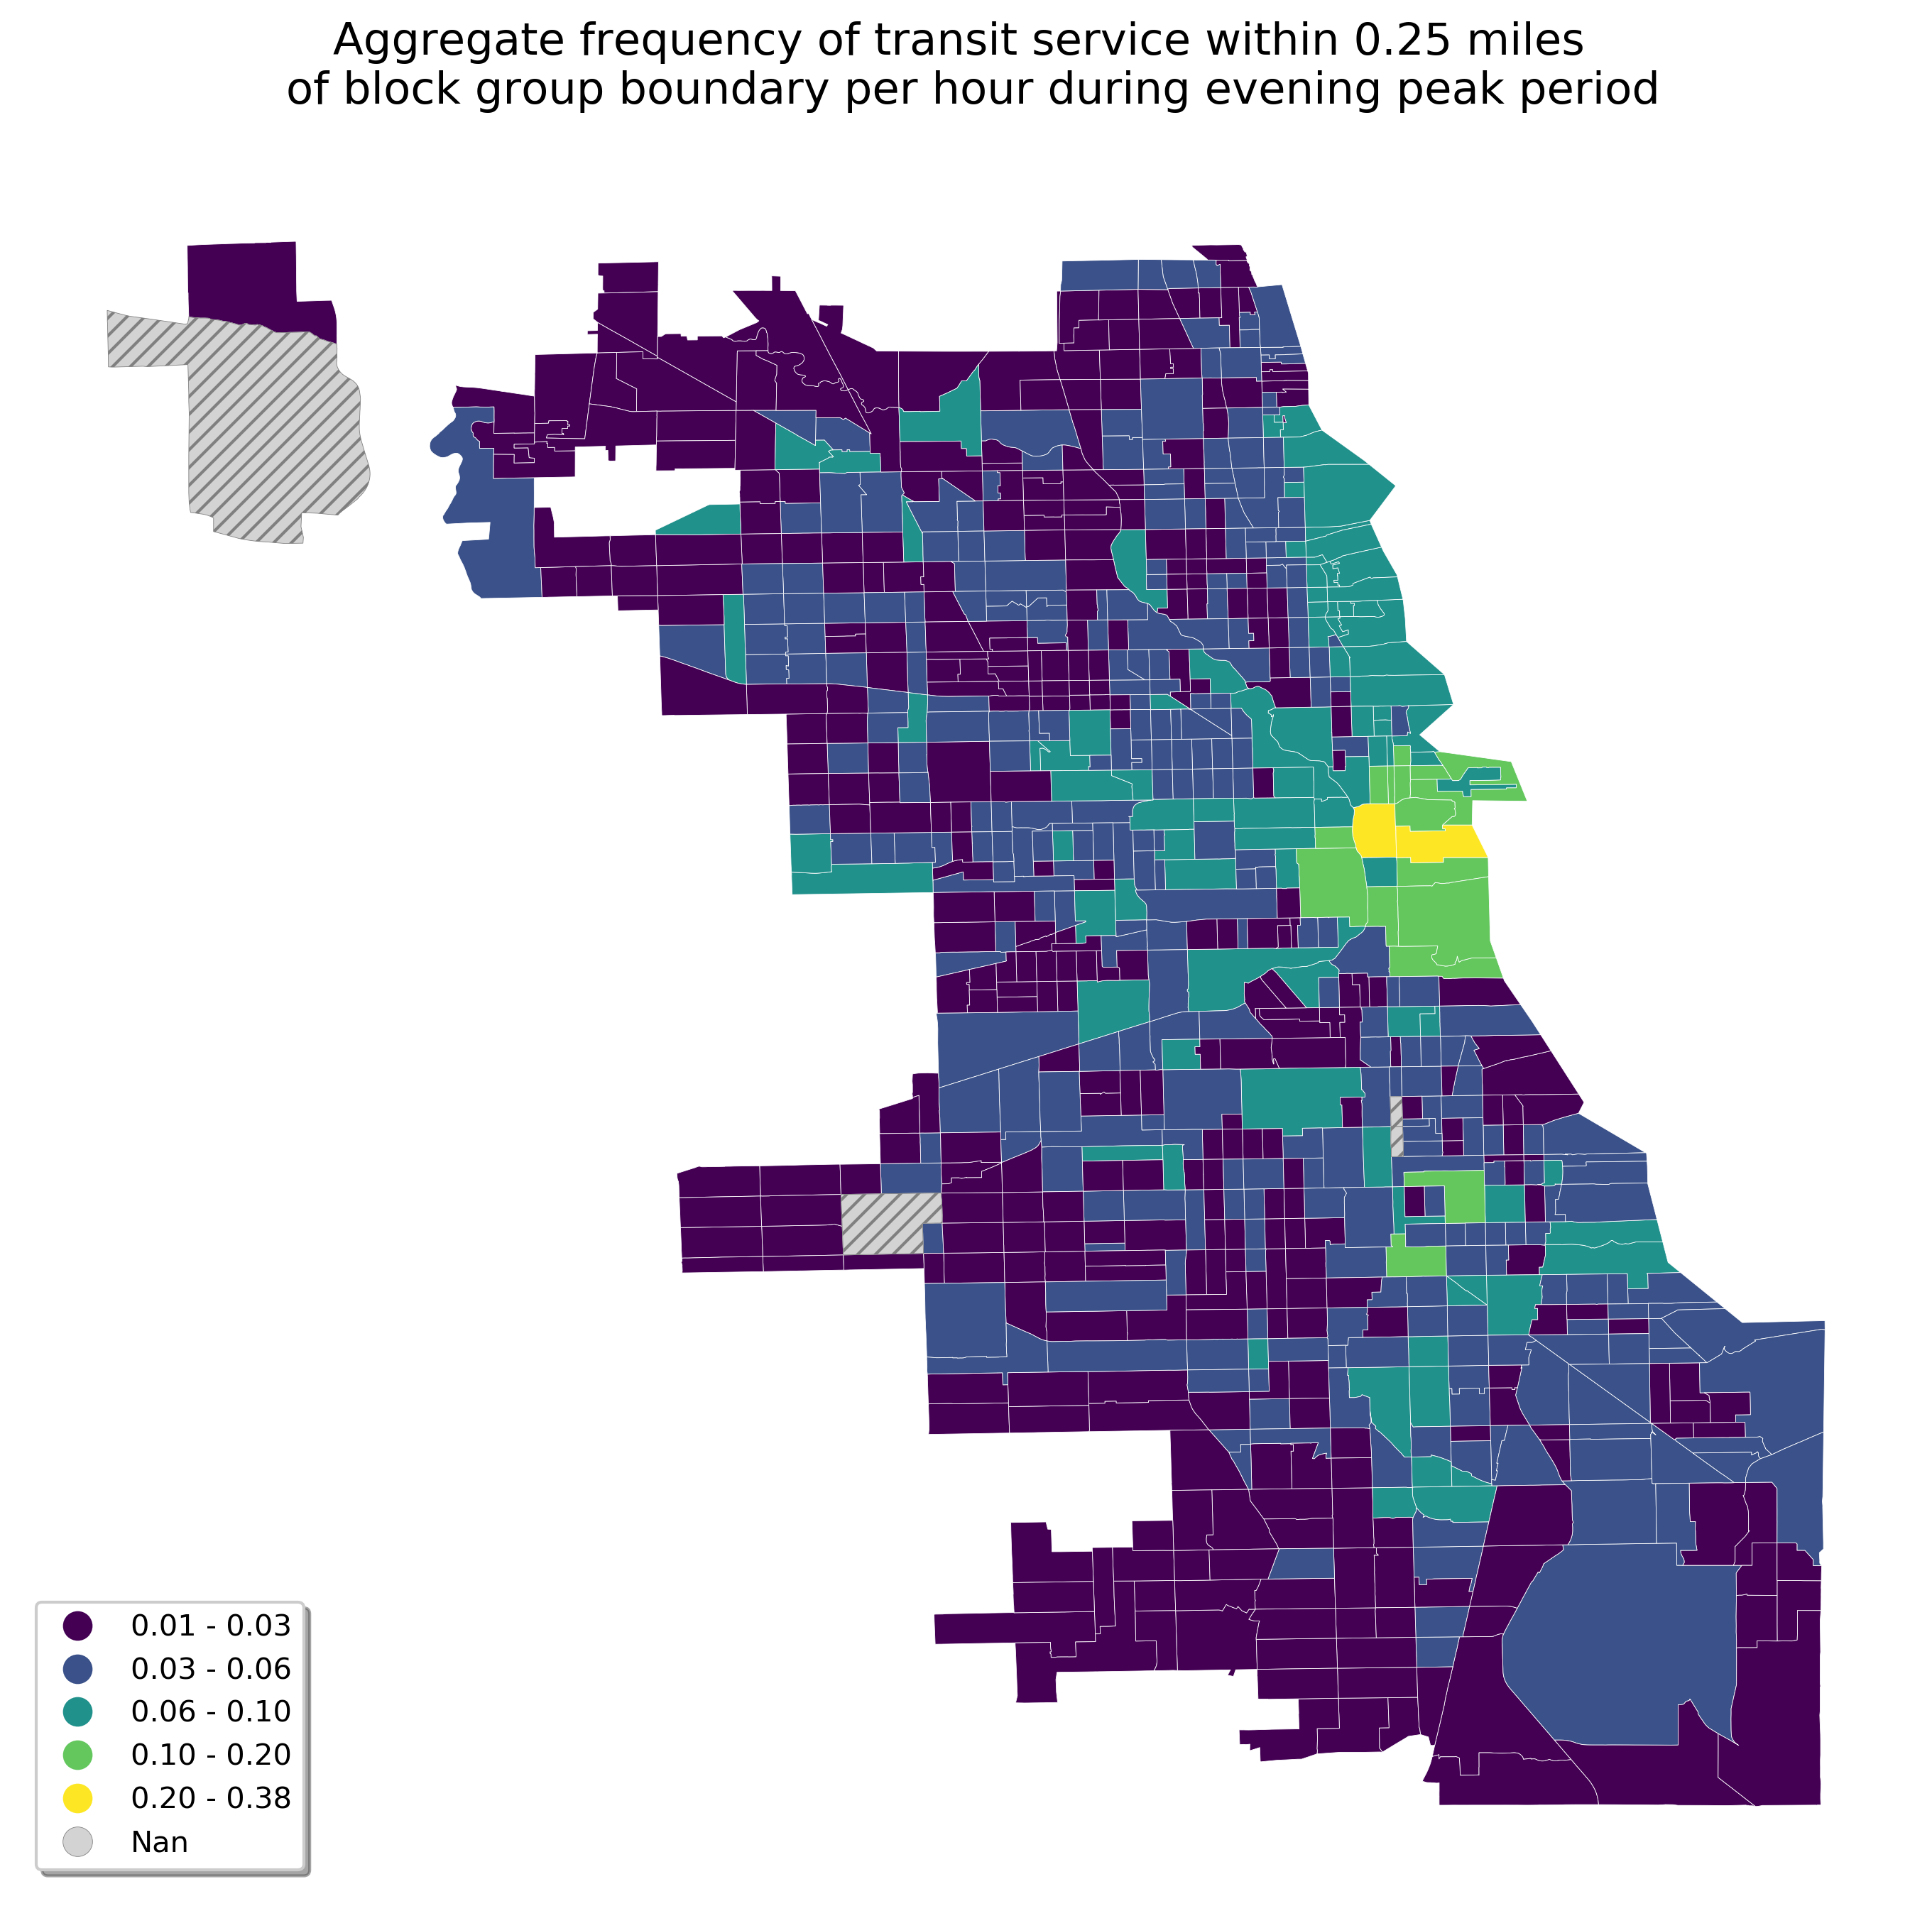

In [24]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='D4c_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': '',
                 'shadow': True
                },
    missing_kwds={
                "color": "lightgrey",
                "edgecolor": "grey",
                "hatch": "////",
                "label": "Nan"
                },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title("Aggregate frequency of transit service within 0.25 miles \n of block group boundary per hour during evening peak period", 
             fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('D4c_normal_map.png', facecolor='w', dpi=500)

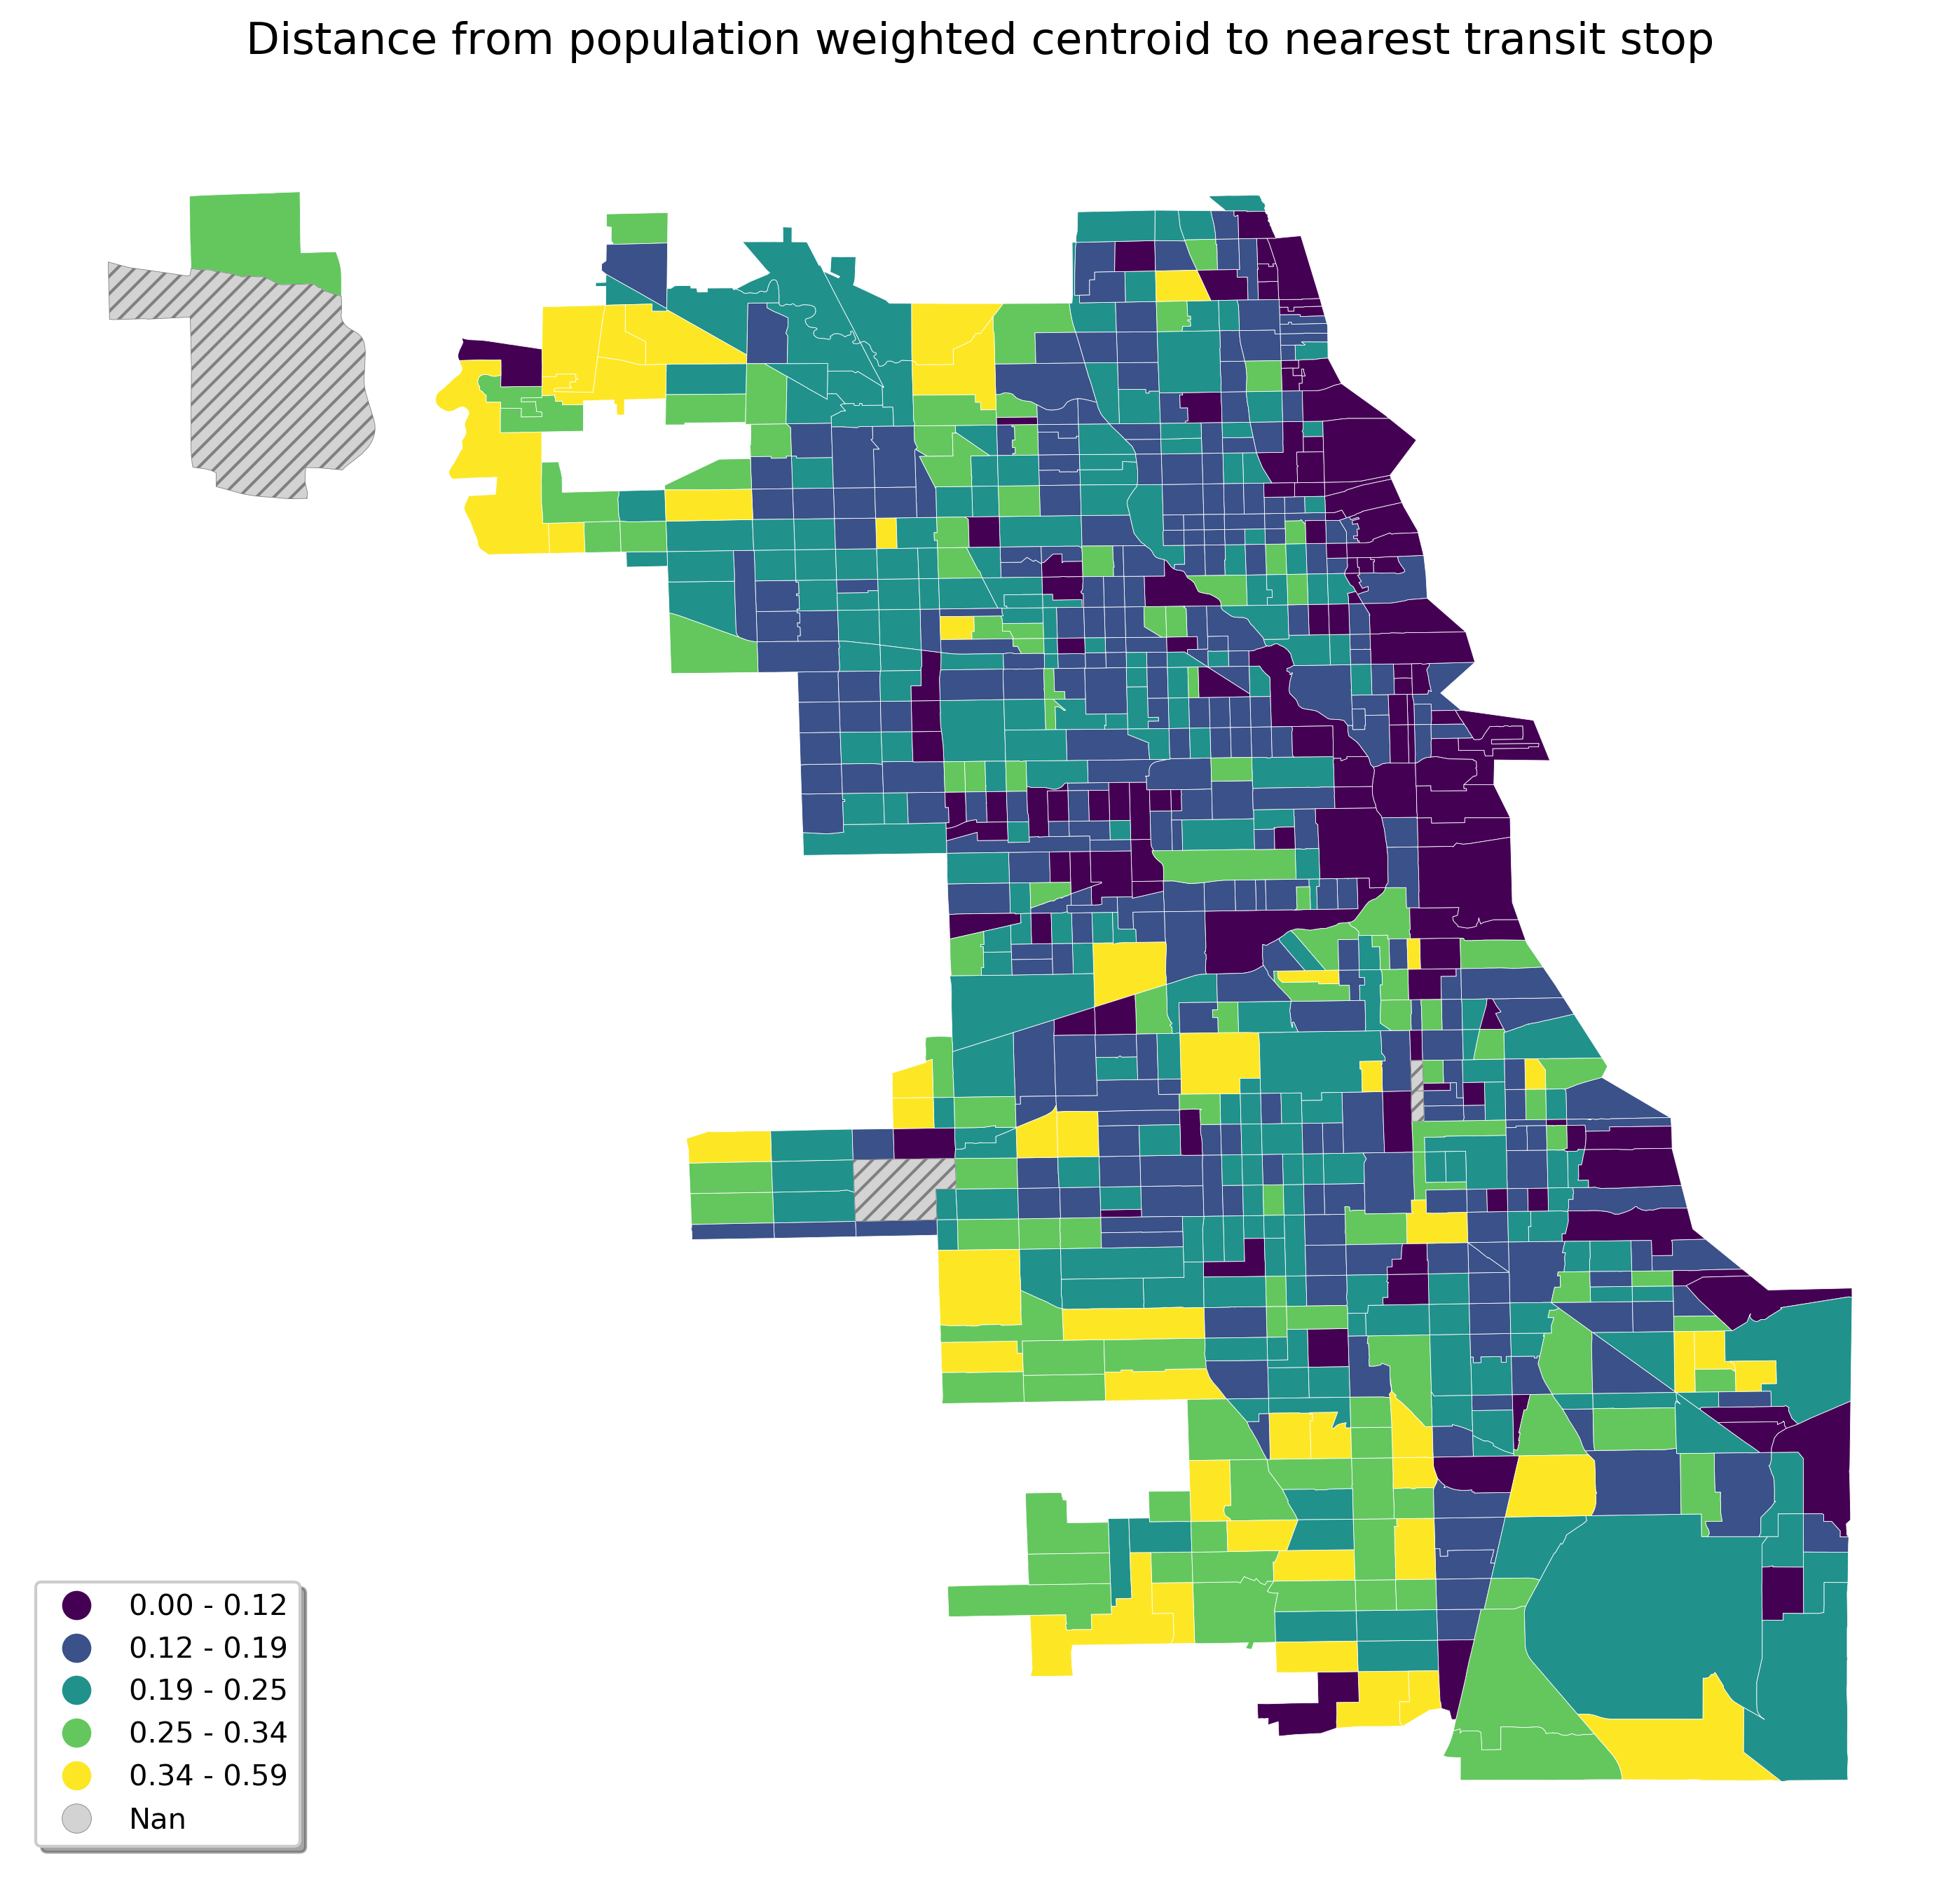

In [25]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='D4a_score',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': '',
                 'shadow': True
                },
    missing_kwds={
                  "color": "lightgrey",
                  "edgecolor": "grey",
                  "hatch": "////",
                  "label": "Nan"
                  },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('off')
ax.set_title('Distance from population weighted centroid to nearest transit stop', 
             fontsize=15,pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('D4a_normal_map.png', facecolor='w', dpi=500)

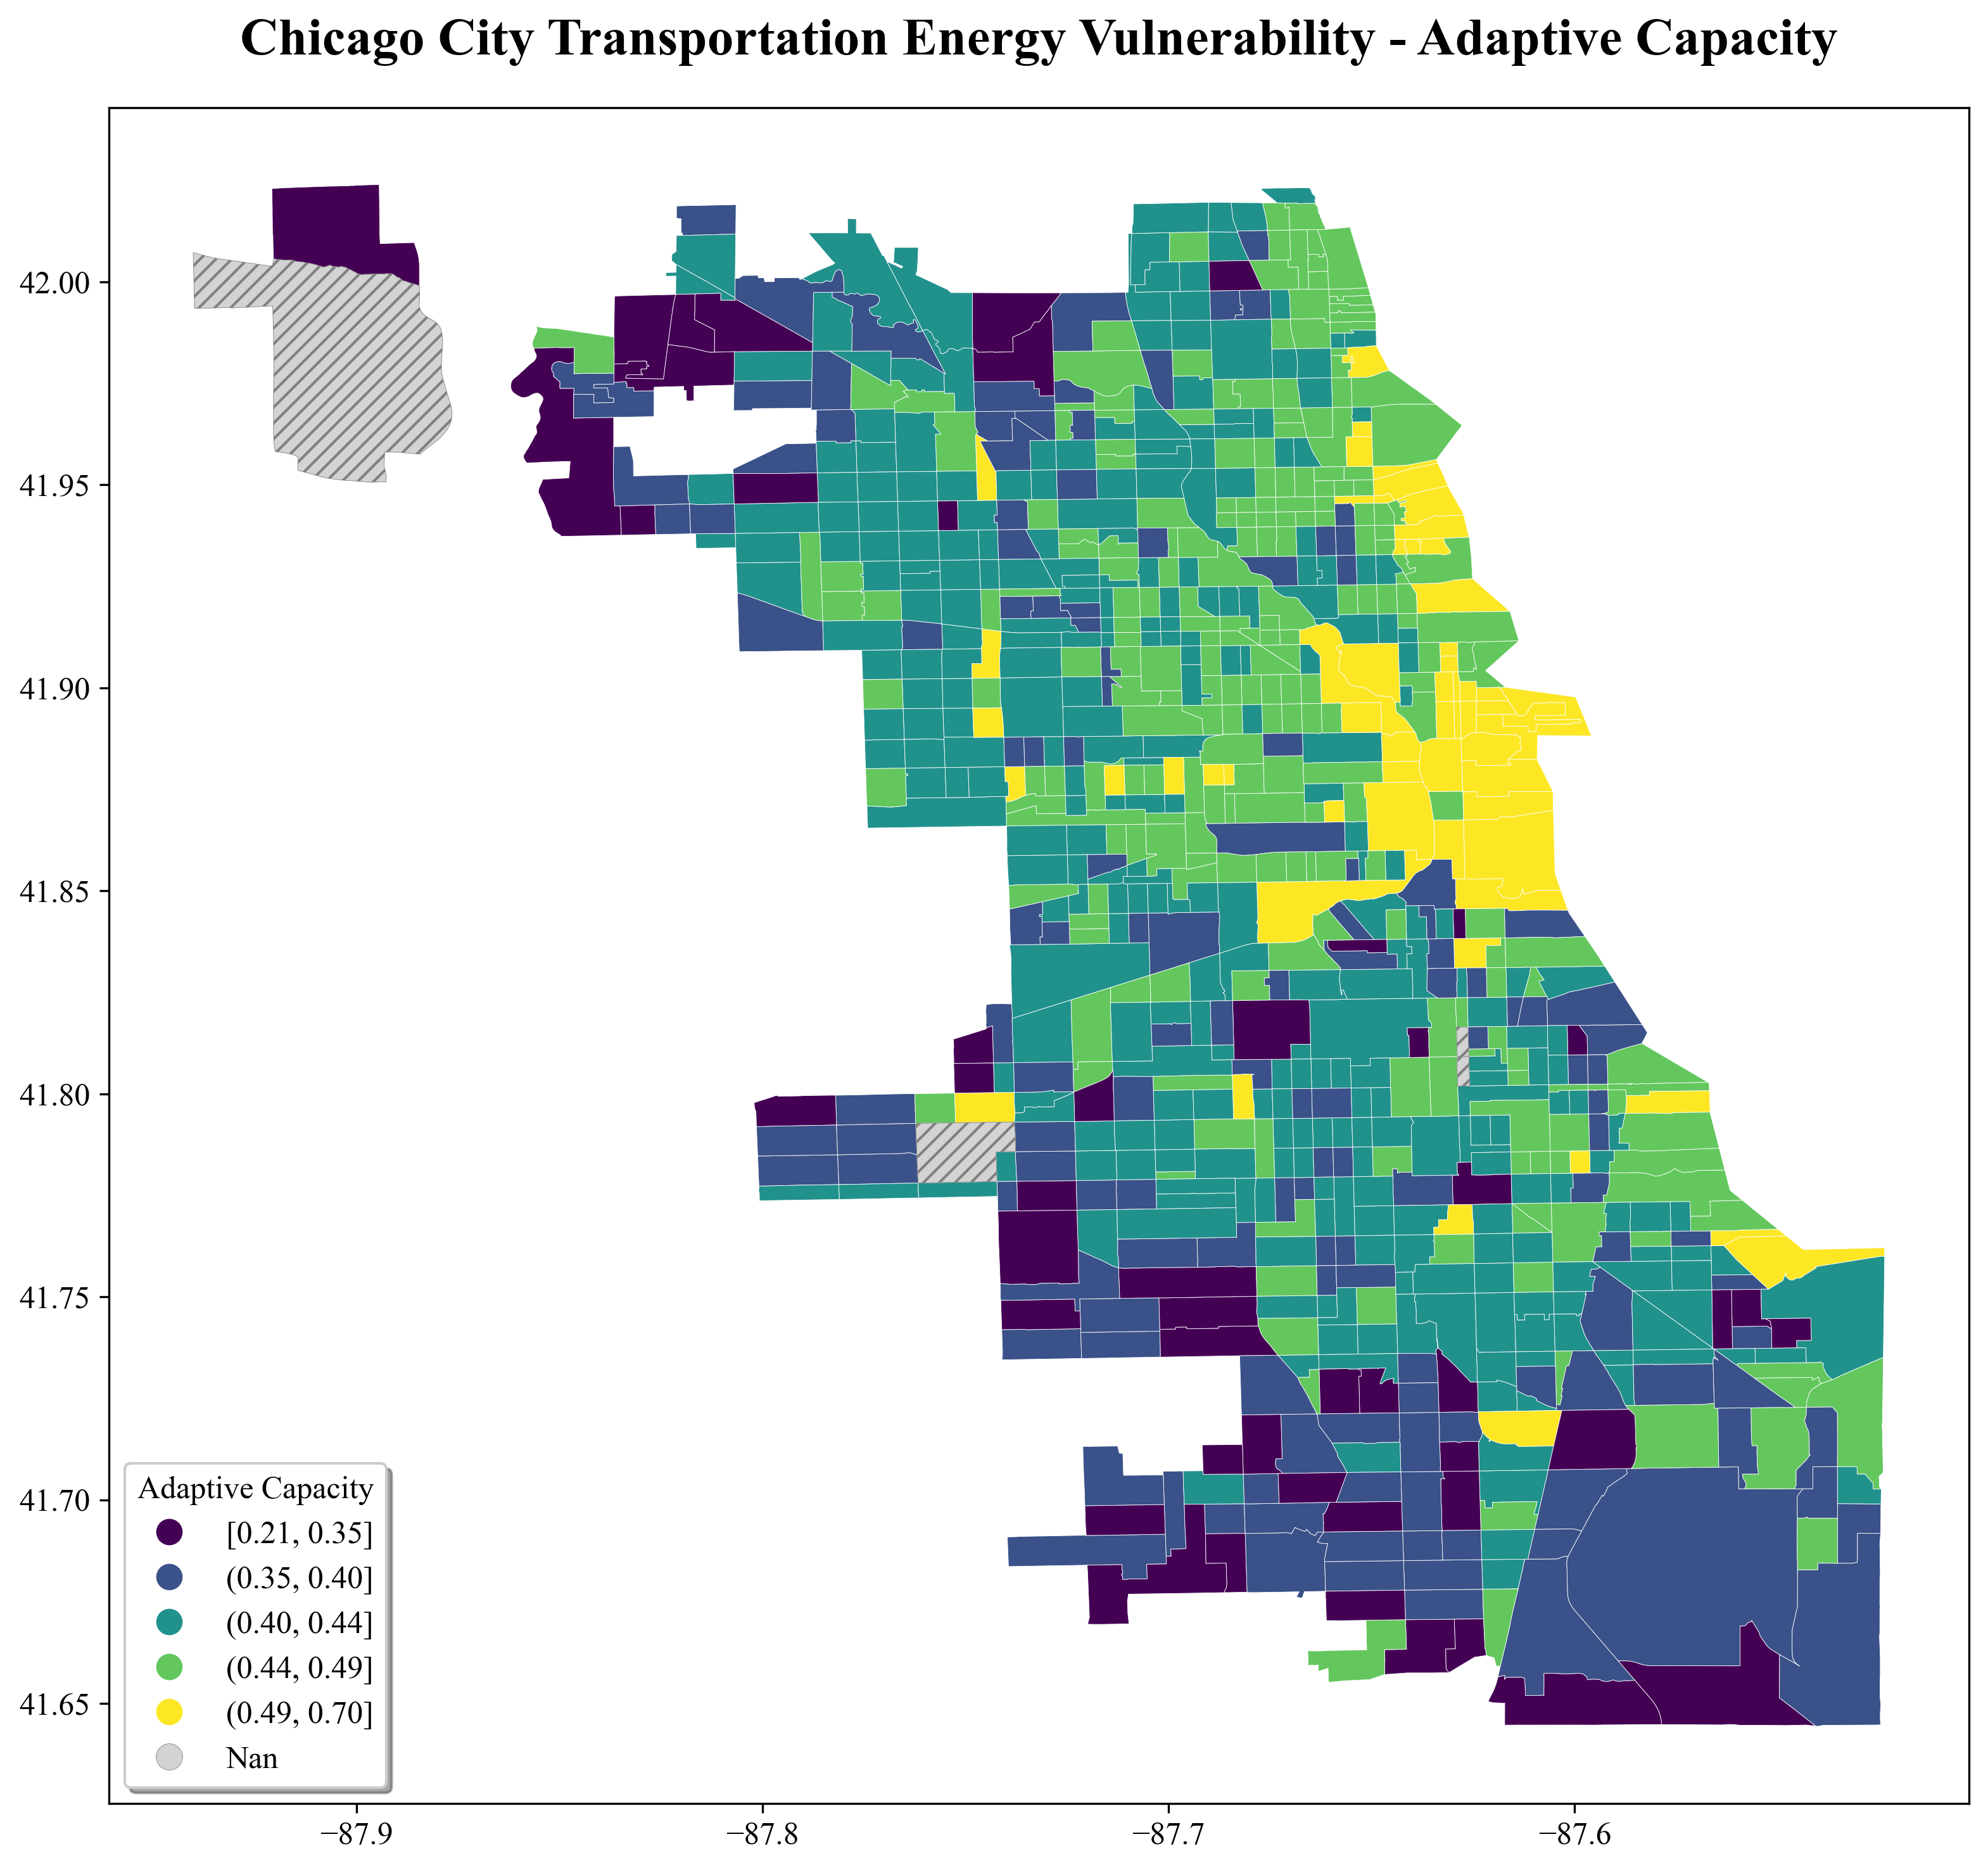

In [37]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 10),dpi=300)

font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

AC_tract_chicago.plot(
    column='min_max_ac',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     k=7,
    legend_kwds={'loc': 'lower left',
                 'title': 'Adaptive Capacity',
                 'shadow': True
                },
    missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "grey",
                 "hatch": "////",
                 "label": "Nan"
                 },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2
)

ax.axis('on')
ax.set_title('Chicago City Transportation Energy Vulnerability - Adaptive Capacity',fontdict={'weight':'bold','size': 20},pad=20)
plt.tight_layout(pad=4.5)

ax.set_aspect('equal','box')
fig.tight_layout()

fig.savefig('Chicago_AC_map.png', facecolor='w', dpi=500)

# Vulnerability Score

In [38]:
vc = pd.read_csv('Vulnerability Score.csv',dtype={'GEOID':str})
vc.head()

Unnamed: 0        GEOID   min-max  min_max_sens  AC_score  vul_score_mulpi  \
0           0  01117030317  0.057365      0.483589  0.000000         0.027741   
1           1  01119011500  0.197691      0.693445  0.000000         0.137088   
2           2  01121010900  0.116124      0.552217  0.000000         0.064125   
3           3  01125010102  0.057489      0.419161  0.000000         0.024097   
4           4  01089000701  0.074292      0.708373  0.215956         0.036583   

   vul_mulpi_1/3  vul_score_add  vul_add_1/3  
0       0.003082       0.540954     0.180318  
1       0.015232       0.891136     0.297045  
2       0.007125       0.668341     0.222780  
3       0.002677       0.476650     0.158883  
4       0.004065       0.566710     0.188903

In [51]:
chi_vc = pd.merge(chicago,vc,left_on='geoid10',right_on="GEOID",how="left")
chi_vc.head()

commarea  commarea_n countyfp10      geoid10 name10         namelsad10  \
0       44        44.0        031  17031842400   8424  Census Tract 8424   
1       59        59.0        031  17031840300   8403  Census Tract 8403   
2       34        34.0        031  17031841100   8411  Census Tract 8411   
3       31        31.0        031  17031841200   8412  Census Tract 8412   
4       32        32.0        031  17031839000   8390  Census Tract 8390   

  notes statefp10 tractce10  \
0  None        17    842400   
1  None        17    840300   
2  None        17    841100   
3  None        17    841200   
4  None        17    839000   

                                            geometry  Unnamed: 0        GEOID  \
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...       23288  17031842400   
1  POLYGON ((-87.68608 41.82296, -87.68607 41.823...       23248  17031840300   
2  POLYGON ((-87.62935 41.85280, -87.62934 41.852...       23250  17031841100   
3  POLYGON ((-87.68813 41.85569, -87.68816 41.856...       21279  17031841200   
4  POLYGON ((-87.63312 41.87449, -87.63306 41.874...       23245  17031839000   

    min-max  min_max_sens  AC_score  vul_score_mulpi  vul_mulpi_1/3  \
0  0.048249      0.706866  0.407631         0.014438       0.001604   
1  0.039394      0.564160  0.421611         0.005616       0.000624   
2  0.067778      0.499806  0.394389         0.007145       0.000794   
3  0.050262      0.644536  0.445493         0.010004       0.001112   
4  0.012753      0.476545  0.485045        -0.000108      -0.000012   

   vul_score_add  vul_add_1/3  
0       0.347484     0.115828  
1       0.181943     0.060648  
2       0.173195     0.057732  
3       0.249305     0.083102  
4       0.004253     0.001418

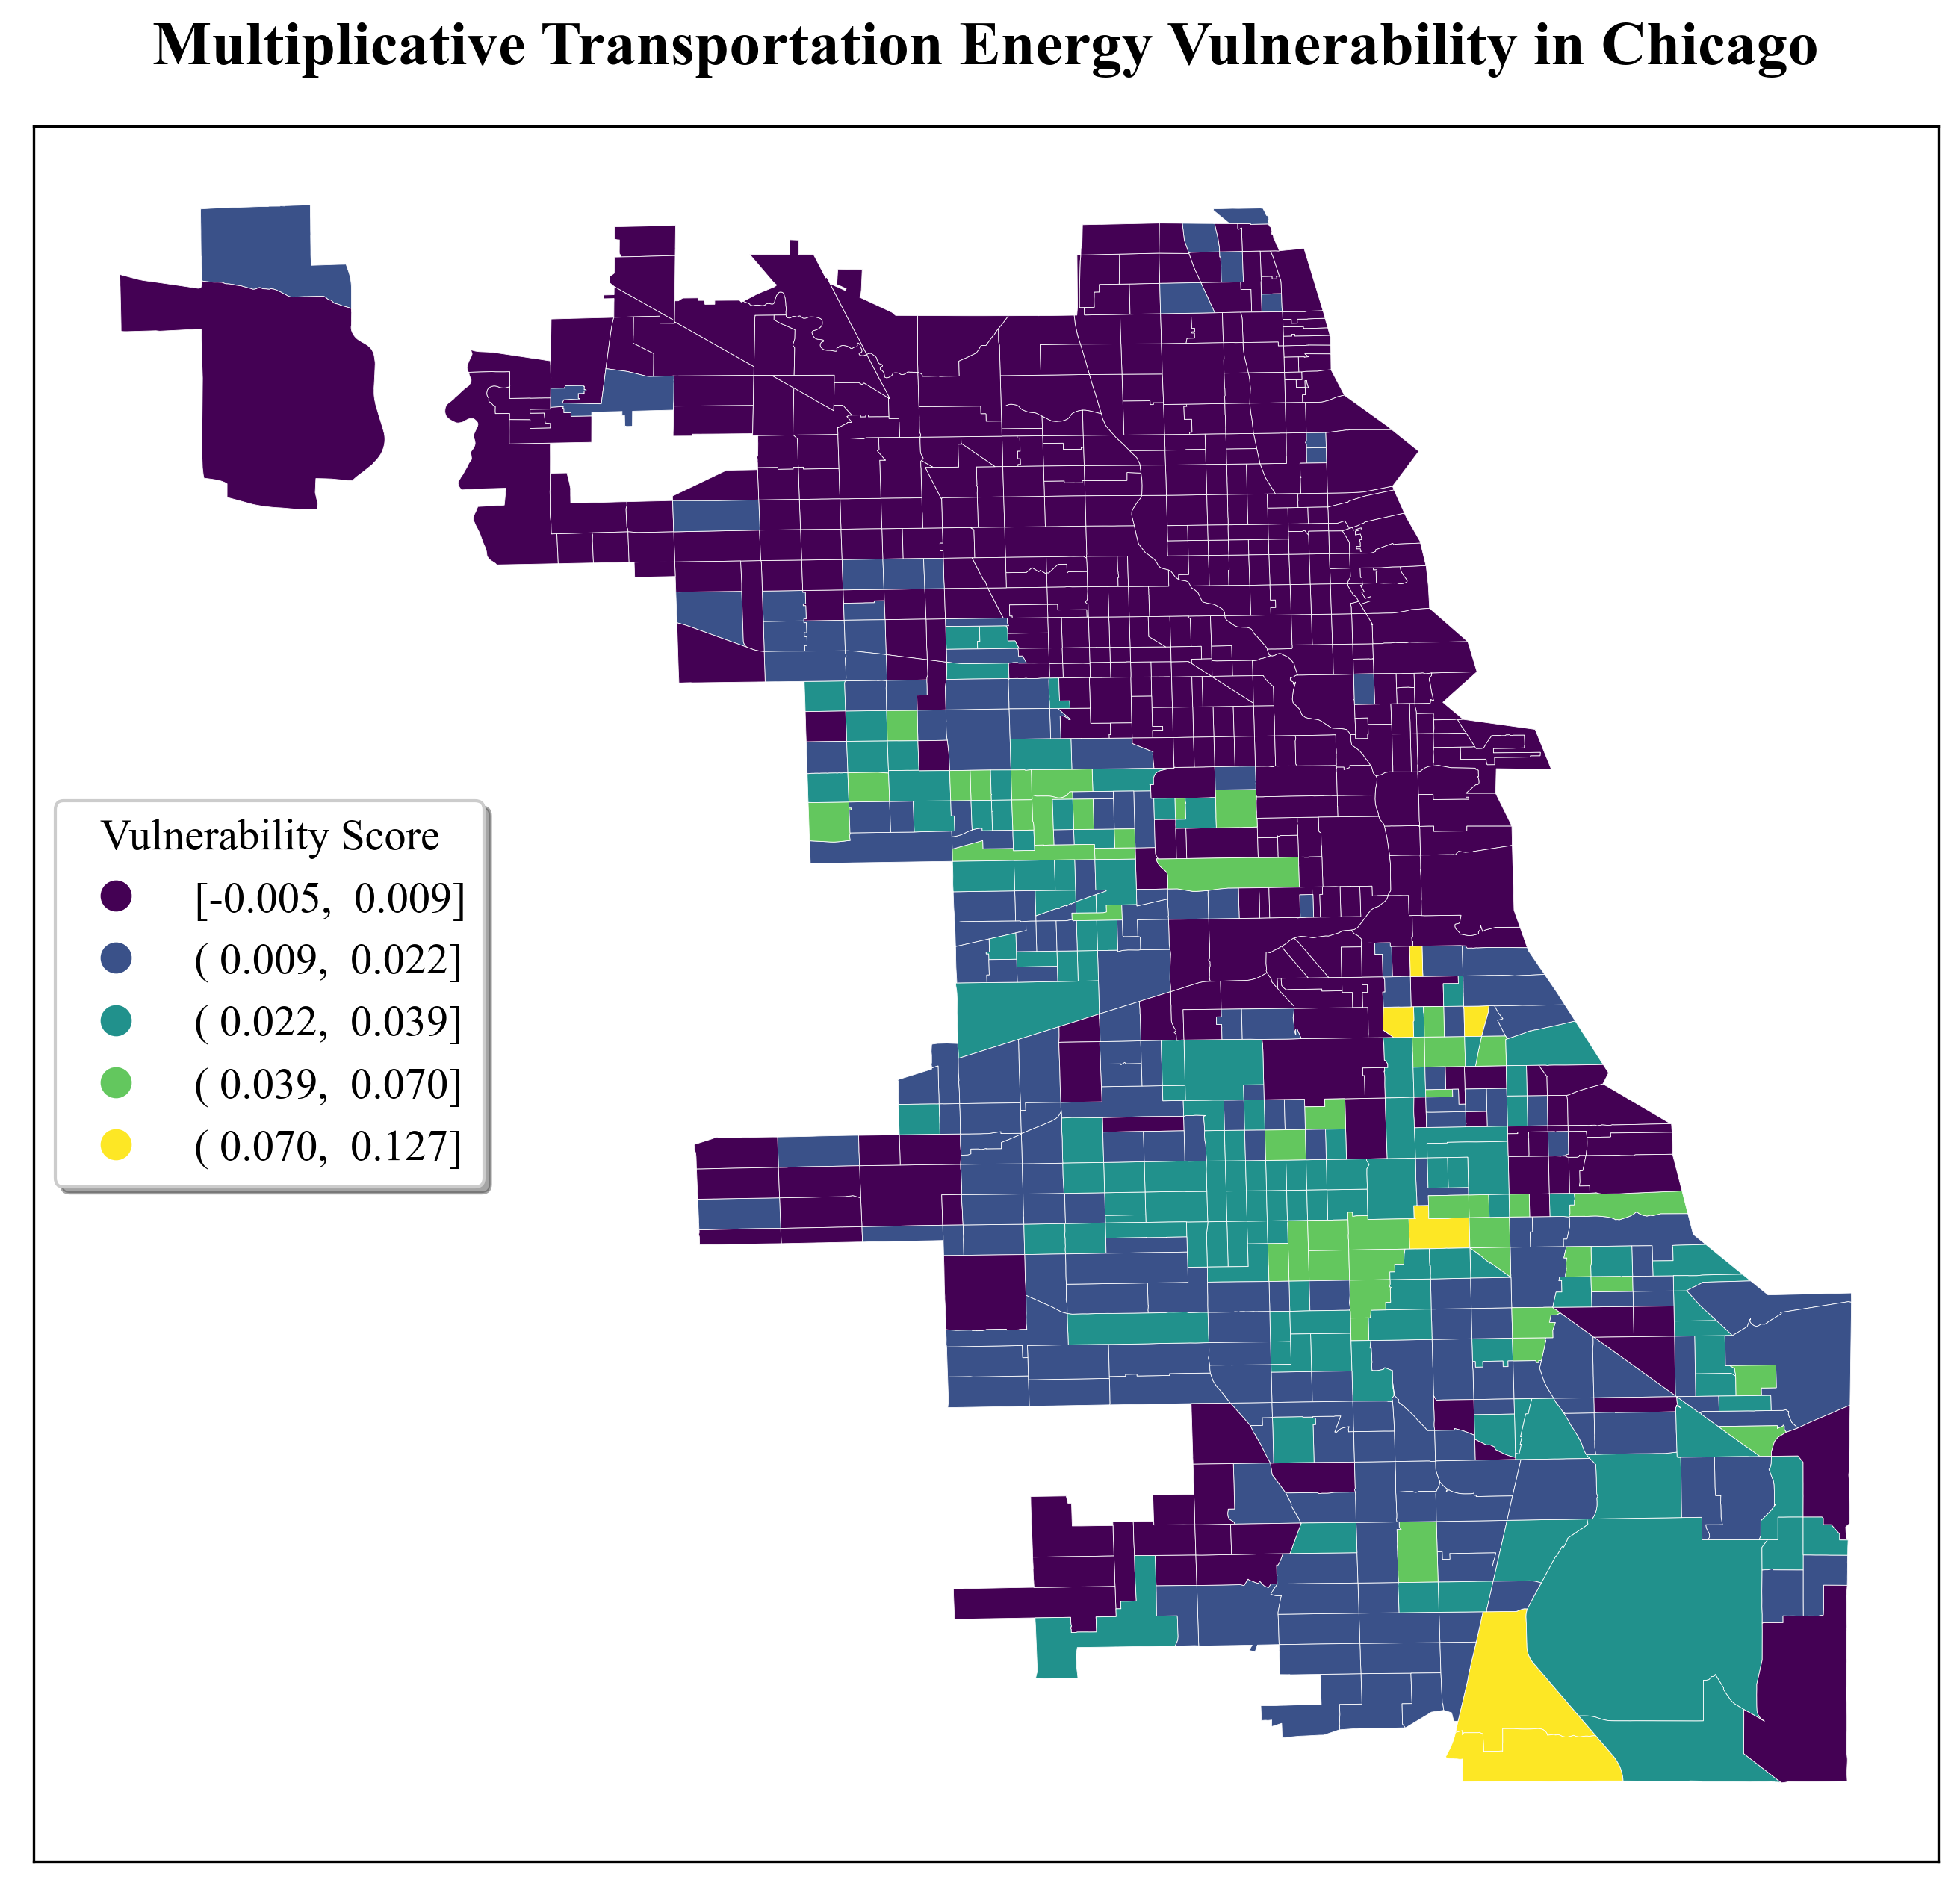

In [40]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10),dpi=300)

font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_vc.plot(
    column='vul_score_mulpi',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     scheme='UserDefined',
#     classification_kwds={
#                         'bins': [0, 0.05, 0.1, 0.15, 0.2, 0.25]
#                         },
#     k=7,
    legend_kwds={'loc': 'center left',
                 'title': 'Vulnerability Score',
                 "fmt": "{:.3f}",
                 'title_fontsize': 14, # 图例标题字体大小
                 'fontsize': 14, # 图例非标题外字体大小
                 'shadow': True},
#     missing_kwds={
#                  "color": "lightgrey",
#                  "edgecolor": "grey",
#                  "hatch": "////",
#                  "label": "Nan"
#                  },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2,
#     vmin=vmin, vmax=vmax
)

# ax.axis('on')
plt.xticks([])
plt.yticks([])
ax.set_title('Multiplicative Transportation Energy Vulnerability in Chicago', fontdict={'weight':'bold','size': 20},pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chicago_vulnerability_multip.png', facecolor='w', dpi=500)

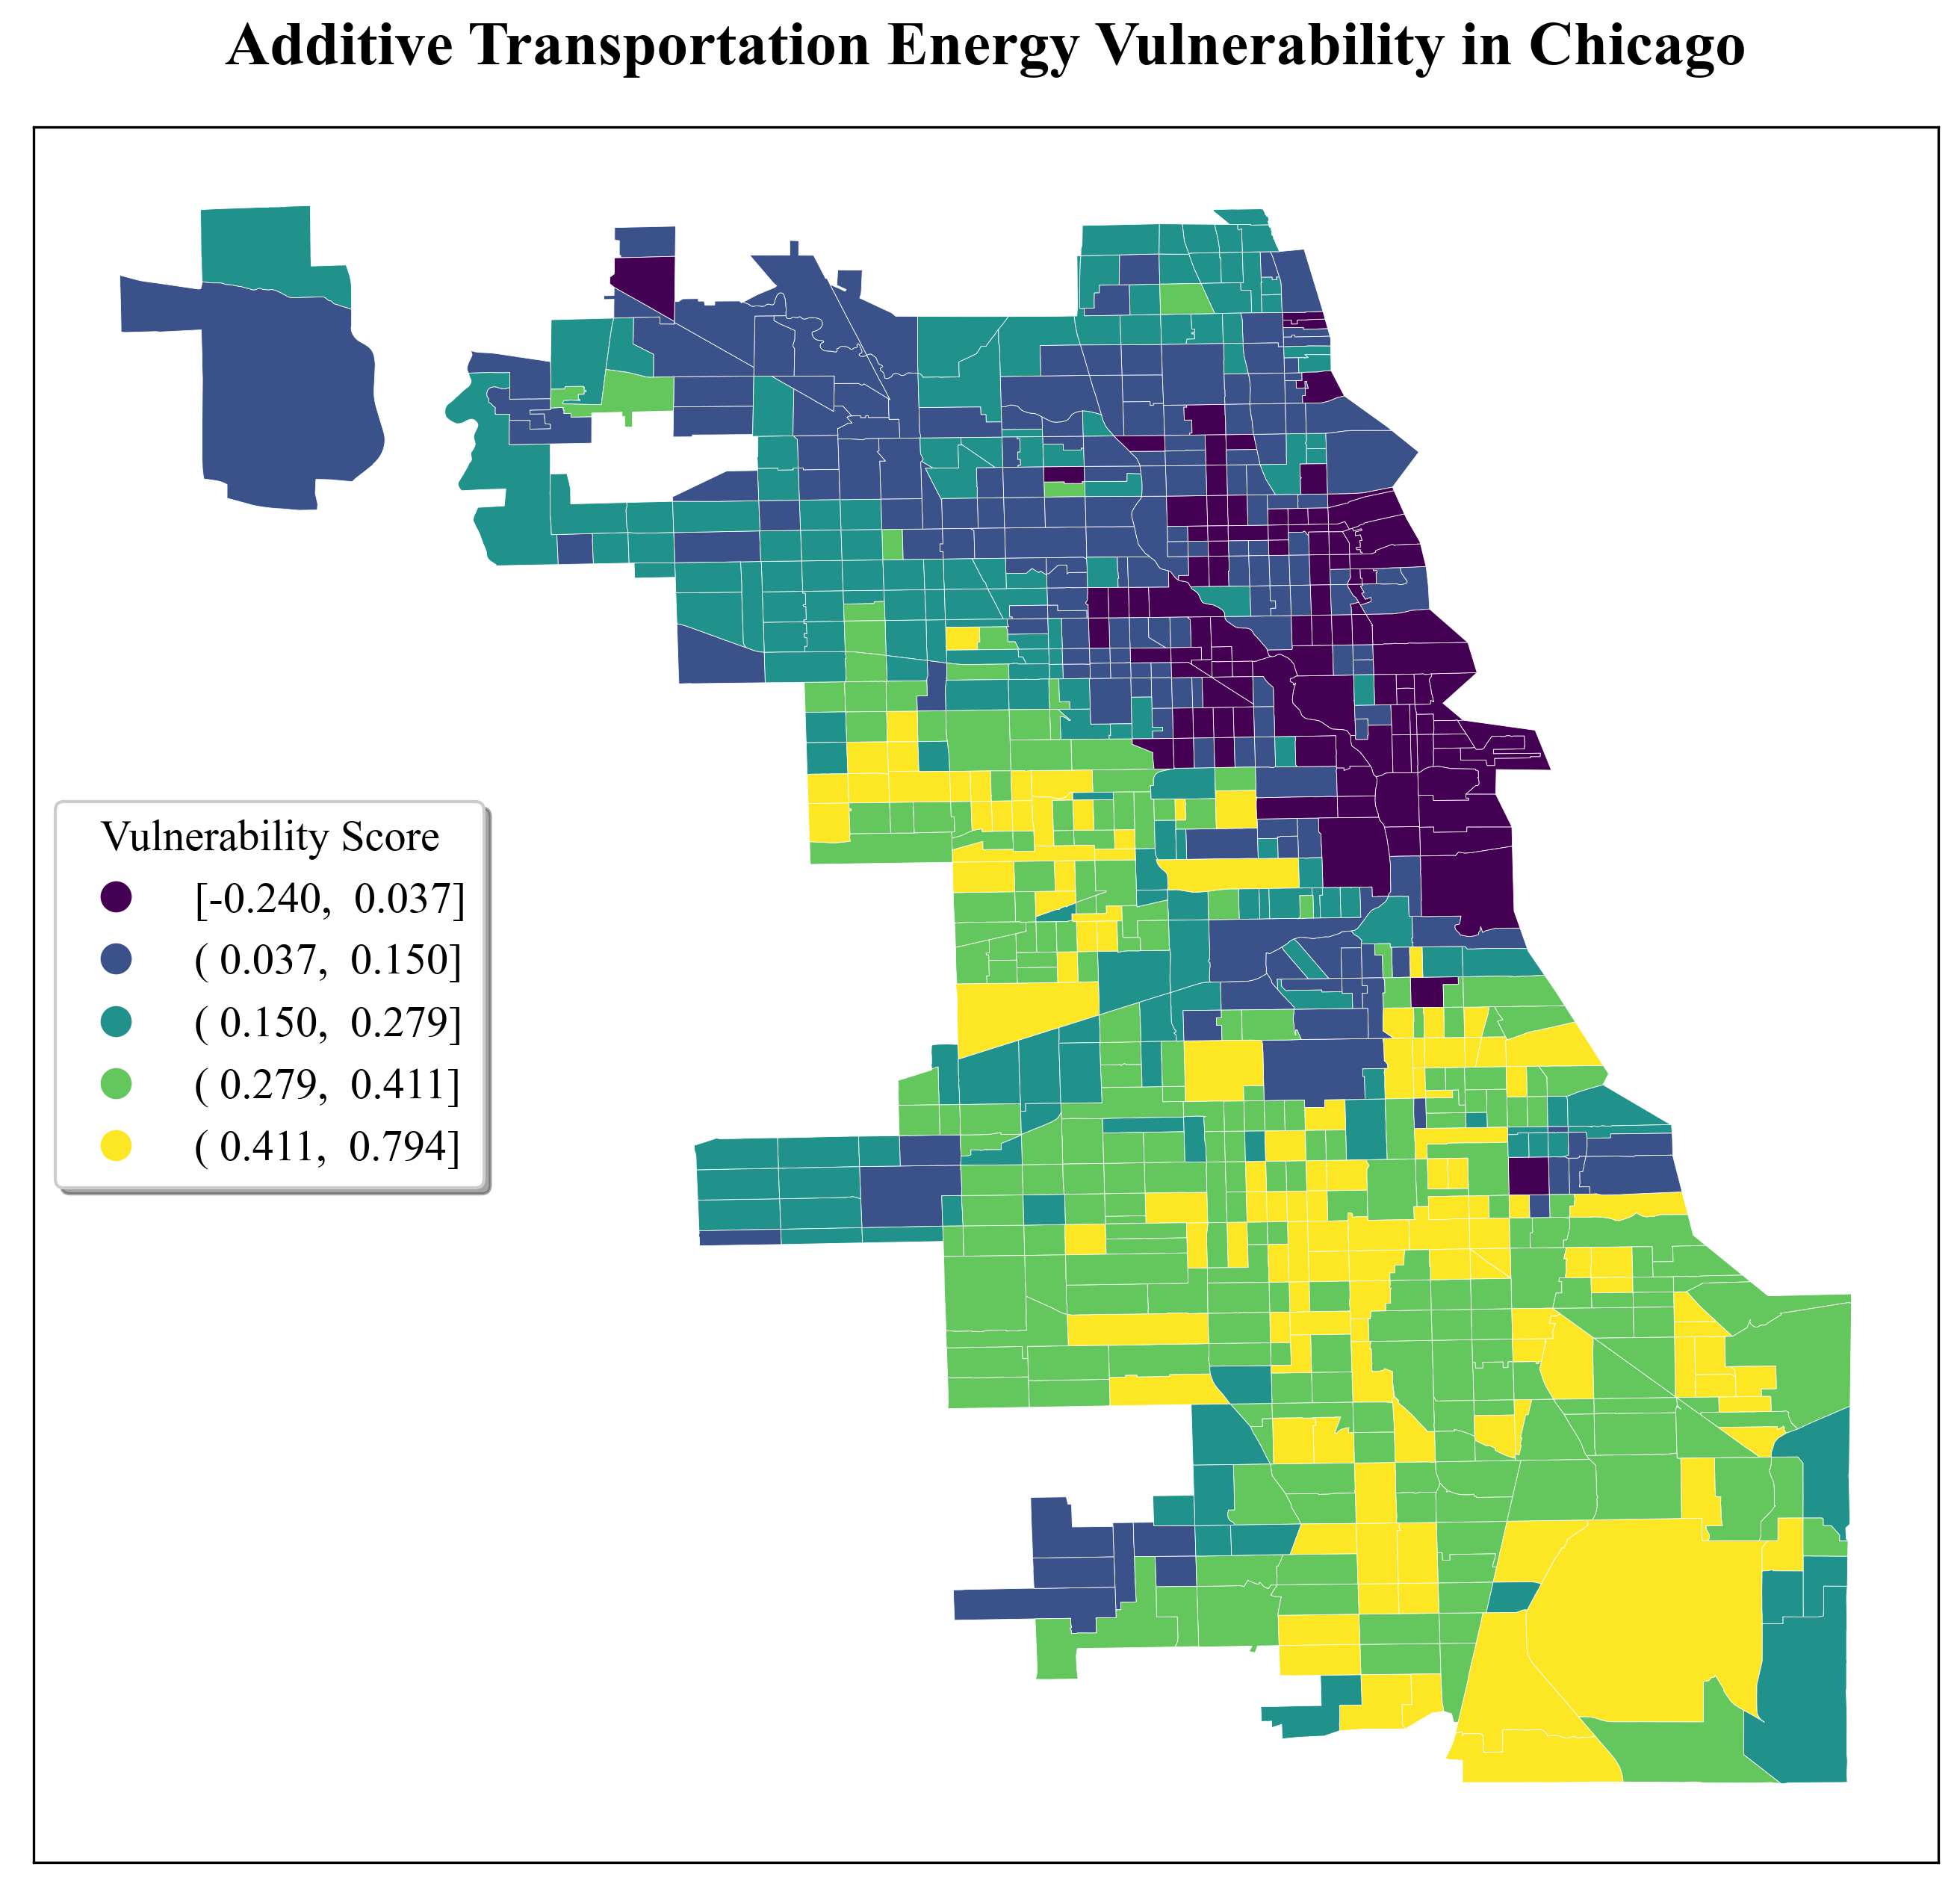

In [41]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10),dpi=300)

font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal',
        'size': 12}
plt.rc('font', **font)

from palettable.matplotlib import Viridis_7

cmap = Viridis_7.mpl_colormap

chi_vc.plot(
    column='vul_score_add',
    ax=ax,
    cmap=cmap,
    legend=True,
#     legend_kwds={'label': 'Exposure'},
    scheme='NaturalBreaks',
#     scheme='UserDefined',
#     classification_kwds={
#                         'bins': [0, 0.05, 0.1, 0.15, 0.2, 0.25]
#                         },
#     k=7,
    legend_kwds={'loc': 'center left',
                 'title': 'Vulnerability Score',
                 "fmt": "{:.3f}",
                 
                 'title_fontsize': 14, # 图例标题字体大小
                 'fontsize': 14, # 图例非标题外字体大小
                 'shadow': True},
#     missing_kwds={
#                  "color": "lightgrey",
#                  "edgecolor": "grey",
#                  "hatch": "////",
#                  "label": "Nan"
#                  },
#     edgecolor=np.array([0., 0., 0., 0.]),
    edgecolor = 'white',
    linewidth=0.2,
#     vmin=vmin, vmax=vmax
)

# ax.axis('on')
plt.xticks([])
plt.yticks([])
ax.set_title('Additive Transportation Energy Vulnerability in Chicago', fontdict={'weight':'bold','size': 20},pad=20)
plt.tight_layout(pad=4.5)


ax.set_aspect('equal','box')
# fig.tight_layout()

fig.savefig('Chicago_vulnerability_add.png', facecolor='w', dpi=500)

In [64]:
chi_ex = chi_ex[['geoid10','namelsad10','min_max_ex']]
chi_sens = chi_sens[['geoid10','min_max_sens']]
AC_tract_chicago = AC_tract_chicago[['geoid10','min_max_ac']]
chi_vc = chi_vc[['geoid10','vul_score_mulpi','vul_score_add']]
chi_all_census  = pd.merge(chi_ex, chi_sens, on='geoid10')
chi_all_census  = pd.merge(chi_all_census,AC_tract_chicago, on='geoid10')
chi_all_census  = pd.merge(chi_all_census,chi_vc, on='geoid10')

In [65]:
chi_all_census.to_csv('chi_all_census.csv')